# Psychoinformatics - Week 14 (Examples)
by Tsung-Ren (Tren) Huang (trhuang@g.ntu.edu.tw)

In [1]:
%config IPCompleter.greedy=True 
#%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd

## 1 Audio Processing

### 1.1 Audio Signals

In [2]:
#!pip install librosa
import librosa
import librosa.display

#### 1.1.1 Synthesized

In [3]:
# Signal consturction:

sampleRate = 44100 # sampling frequency (Hz)
frequency = 20000 # tone frequency (Hz)
doremi = [261.63, 293.66, 329.63, 349.23, 392.00, 440.00, 493.88, 523.25] # tone frequency (Hz)
length = 1 # tone duration (second)

t = np.linspace(0, length, sampleRate*length+1)  #  Produces a 1 second Audio-File
#y = np.sin(5*2*np.pi*t) #frequency=5Hz
y = np.concatenate([np.sin(freq*2*np.pi*t) for freq in doremi])

ipd.Audio(y,rate=sampleRate)

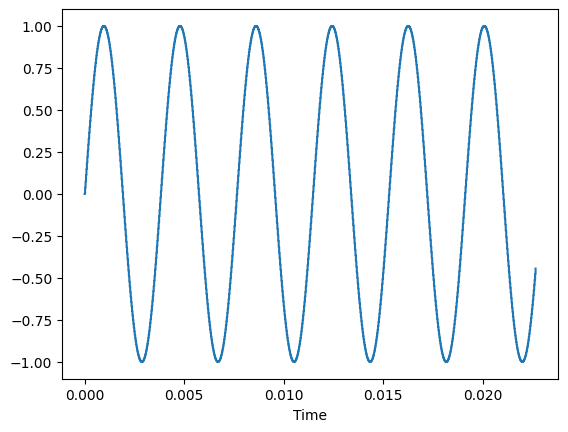

In [8]:
# Signal Visualization:
librosa.display.waveshow(y[0:1000], sr=sampleRate);

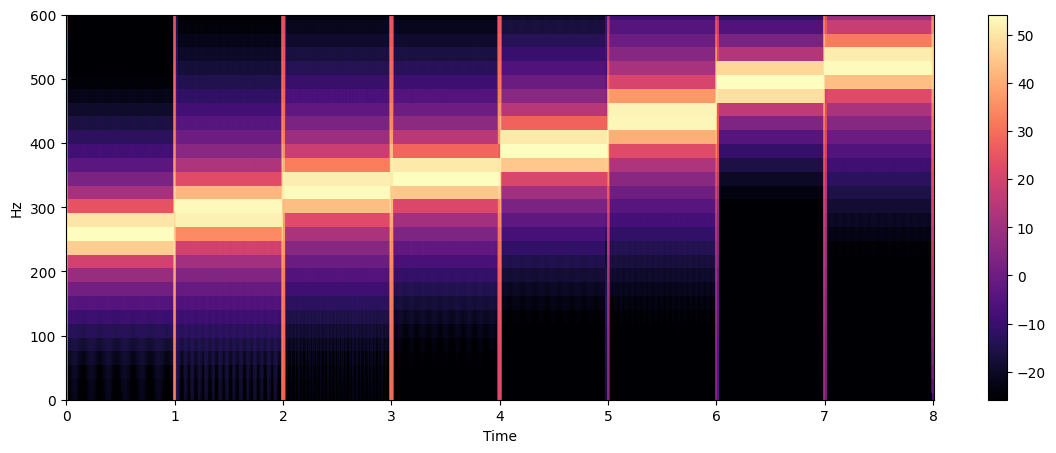

In [9]:
# Show Spectrogram:
Y = librosa.stft(y)
Ydb = librosa.amplitude_to_db(abs(Y))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Ydb, sr=sampleRate, x_axis='time', y_axis='hz');
plt.ylim([0,600]); plt.colorbar();

#### 1.1.2 Real-world signals
WAV formats are described <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.read.html#r7015bff88555-1">here</a>.

In [10]:
y, sr = librosa.load('speech/anger/52_M_A_8.wav',sr=None,mono=True)
print(sr,y.shape,y.dtype)

44100 (182272,) float32


In [11]:
ipd.Audio(y,rate=sr)

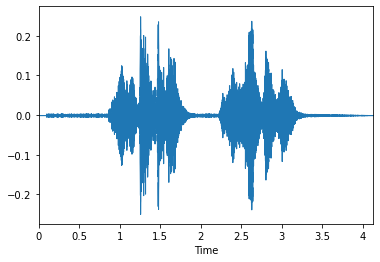

In [8]:
# Time domain:
librosa.display.waveplot(y, sr);

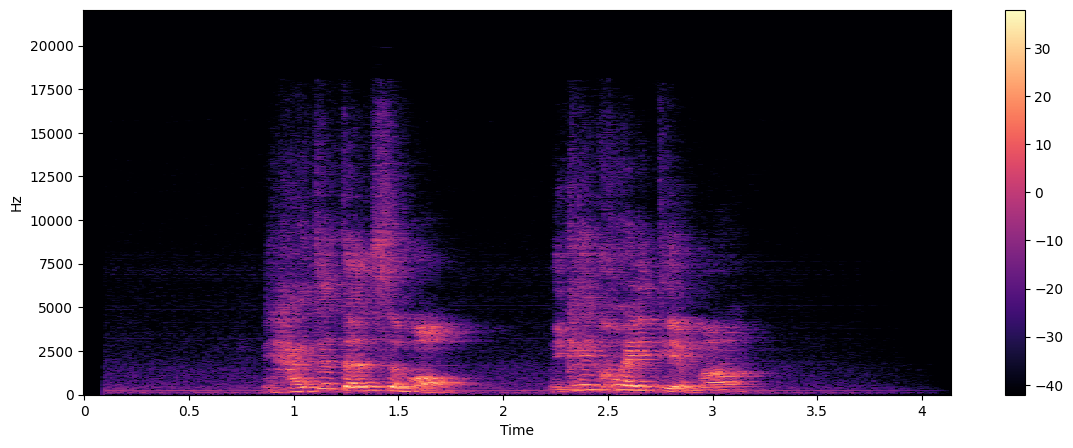

In [13]:
# Spectrogram:
Y = librosa.stft(y)
Ydb = librosa.amplitude_to_db(abs(Y))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Ydb, sr=sampleRate, x_axis='time', y_axis='hz');
plt.colorbar();

(20, 357)
[-5.1851434e+02  1.0895301e+02  2.9087122e+01  6.3047395e+00
  1.1638897e+01  1.2783335e+01  7.9373598e+00  1.7709994e+00
 -2.3316593e+00 -6.5337830e+00 -4.3073859e+00  8.1382018e-01
 -7.9005367e-01 -2.7049607e-01  2.2183299e+00  1.9682282e-01
 -3.2817333e+00 -7.1311073e+00 -5.0332069e+00  2.4407345e-01]


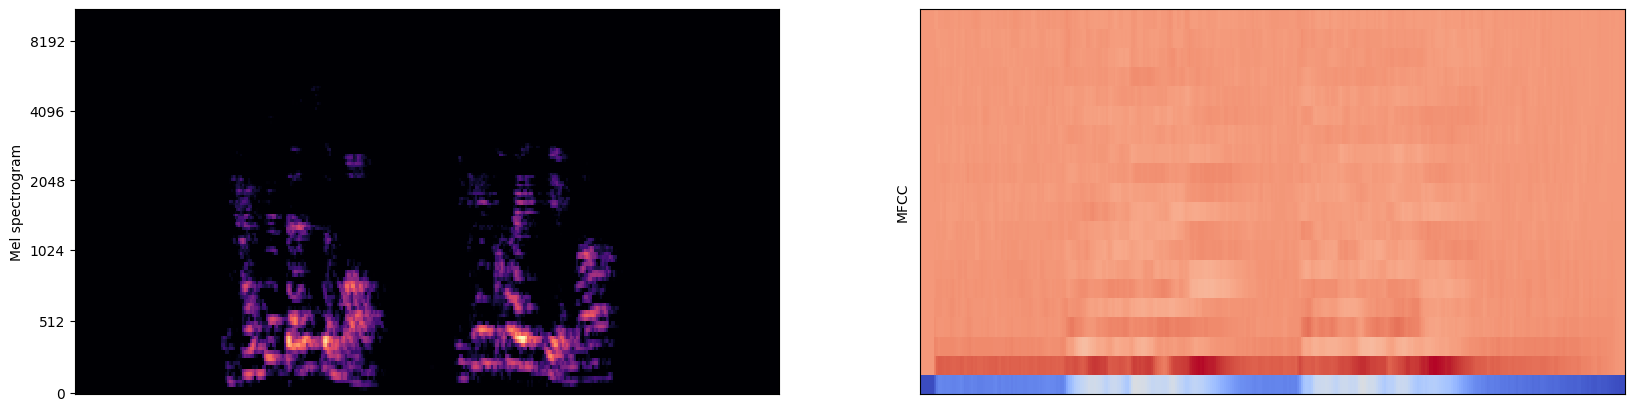

In [14]:
# Cepstrum & Spectral Features:

M = librosa.feature.melspectrogram(y=y, sr=sr)
MFCC = librosa.feature.mfcc(y=y, sr=sr)

plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
librosa.display.specshow(librosa.amplitude_to_db(M), y_axis='mel')
plt.ylabel('Mel spectrogram');
plt.subplot(1,2,2)
librosa.display.specshow(MFCC)
plt.ylabel('MFCC');
print(MFCC.shape)
print(MFCC[:,10])

### 1.2 Machine Learning

Here is the <a href=https://github.com/tyiannak/pyAudioAnalysis/wiki>wiki</a> of pyAudioAnalysis

In [ ]:
#!pip install hmmlearn eyed3 pydub plotly imbalanced-learn # needed by pyAudioAnalysis
#!pip install pyaudioanalysis

#### 1.2.1 Emotion Classification


In [16]:
# Training:

from pyAudioAnalysis import audioTrainTest as aT
aT.extract_features_and_train(["speech/anger","speech/happy"], 2.0, 2.0, aT.shortTermWindow, aT.shortTermStep, "svm", "svm2emotions")

/Users/tren/miniconda3/lib/python3.10/site-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


Analyzing file 1 of 10: speech/anger/52_M_A_8.wav
Analyzing file 2 of 10: speech/anger/54_F_A_1.wav
Analyzing file 3 of 10: speech/anger/54_M_A_9.wav
Analyzing file 4 of 10: speech/anger/55_F_A_3.wav
Analyzing file 5 of 10: speech/anger/56_F_A_9.wav
Analyzing file 6 of 10: speech/anger/60_F_A_8.wav
Analyzing file 7 of 10: speech/anger/60_F_A_8_2.wav
Analyzing file 8 of 10: speech/anger/60_M_A_7.wav
Analyzing file 9 of 10: speech/anger/62_F_A_9.wav
Analyzing file 10 of 10: speech/anger/65_M_A_8.wav
Feature extraction complexity ratio: 50.4 x realtime
Analyzing file 1 of 10: speech/happy/51_F_H_6.wav
Analyzing file 2 of 10: speech/happy/53_F_H_6.wav
Analyzing file 3 of 10: speech/happy/56_F_H_7.wav
Analyzing file 4 of 10: speech/happy/59_F_H_7.wav
Analyzing file 5 of 10: speech/happy/62_F_H_6.wav
Analyzing file 6 of 10: speech/happy/66_F_H_6.wav
Analyzing file 7 of 10: speech/happy/68_M_H_6.wav
Analyzing file 8 of 10: speech/happy/69_M_H_7.wav
Analyzing file 9 of 10: speech/happy/74_F_H_

Param = 0.00100 - classifier Evaluation Experiment 174 of 2501
Param = 0.00100 - classifier Evaluation Experiment 175 of 2501
Param = 0.00100 - classifier Evaluation Experiment 176 of 2501
Param = 0.00100 - classifier Evaluation Experiment 177 of 2501
Param = 0.00100 - classifier Evaluation Experiment 178 of 2501
Param = 0.00100 - classifier Evaluation Experiment 179 of 2501
Param = 0.00100 - classifier Evaluation Experiment 180 of 2501
Param = 0.00100 - classifier Evaluation Experiment 181 of 2501
Param = 0.00100 - classifier Evaluation Experiment 182 of 2501
Param = 0.00100 - classifier Evaluation Experiment 183 of 2501
Param = 0.00100 - classifier Evaluation Experiment 184 of 2501
Param = 0.00100 - classifier Evaluation Experiment 185 of 2501
Param = 0.00100 - classifier Evaluation Experiment 186 of 2501
Param = 0.00100 - classifier Evaluation Experiment 187 of 2501
Param = 0.00100 - classifier Evaluation Experiment 188 of 2501
Param = 0.00100 - classifier Evaluation Experiment 189 

Param = 0.00100 - classifier Evaluation Experiment 327 of 2501
Param = 0.00100 - classifier Evaluation Experiment 328 of 2501
Param = 0.00100 - classifier Evaluation Experiment 329 of 2501
Param = 0.00100 - classifier Evaluation Experiment 330 of 2501
Param = 0.00100 - classifier Evaluation Experiment 331 of 2501
Param = 0.00100 - classifier Evaluation Experiment 332 of 2501
Param = 0.00100 - classifier Evaluation Experiment 333 of 2501
Param = 0.00100 - classifier Evaluation Experiment 334 of 2501
Param = 0.00100 - classifier Evaluation Experiment 335 of 2501
Param = 0.00100 - classifier Evaluation Experiment 336 of 2501
Param = 0.00100 - classifier Evaluation Experiment 337 of 2501
Param = 0.00100 - classifier Evaluation Experiment 338 of 2501
Param = 0.00100 - classifier Evaluation Experiment 339 of 2501
Param = 0.00100 - classifier Evaluation Experiment 340 of 2501
Param = 0.00100 - classifier Evaluation Experiment 341 of 2501
Param = 0.00100 - classifier Evaluation Experiment 342 

Param = 0.00100 - classifier Evaluation Experiment 480 of 2501
Param = 0.00100 - classifier Evaluation Experiment 481 of 2501
Param = 0.00100 - classifier Evaluation Experiment 482 of 2501
Param = 0.00100 - classifier Evaluation Experiment 483 of 2501
Param = 0.00100 - classifier Evaluation Experiment 484 of 2501
Param = 0.00100 - classifier Evaluation Experiment 485 of 2501
Param = 0.00100 - classifier Evaluation Experiment 486 of 2501
Param = 0.00100 - classifier Evaluation Experiment 487 of 2501
Param = 0.00100 - classifier Evaluation Experiment 488 of 2501
Param = 0.00100 - classifier Evaluation Experiment 489 of 2501
Param = 0.00100 - classifier Evaluation Experiment 490 of 2501
Param = 0.00100 - classifier Evaluation Experiment 491 of 2501
Param = 0.00100 - classifier Evaluation Experiment 492 of 2501
Param = 0.00100 - classifier Evaluation Experiment 493 of 2501
Param = 0.00100 - classifier Evaluation Experiment 494 of 2501
Param = 0.00100 - classifier Evaluation Experiment 495 

Param = 0.00100 - classifier Evaluation Experiment 635 of 2501
Param = 0.00100 - classifier Evaluation Experiment 636 of 2501
Param = 0.00100 - classifier Evaluation Experiment 637 of 2501
Param = 0.00100 - classifier Evaluation Experiment 638 of 2501
Param = 0.00100 - classifier Evaluation Experiment 639 of 2501
Param = 0.00100 - classifier Evaluation Experiment 640 of 2501
Param = 0.00100 - classifier Evaluation Experiment 641 of 2501
Param = 0.00100 - classifier Evaluation Experiment 642 of 2501
Param = 0.00100 - classifier Evaluation Experiment 643 of 2501
Param = 0.00100 - classifier Evaluation Experiment 644 of 2501
Param = 0.00100 - classifier Evaluation Experiment 645 of 2501
Param = 0.00100 - classifier Evaluation Experiment 646 of 2501
Param = 0.00100 - classifier Evaluation Experiment 647 of 2501
Param = 0.00100 - classifier Evaluation Experiment 648 of 2501
Param = 0.00100 - classifier Evaluation Experiment 649 of 2501
Param = 0.00100 - classifier Evaluation Experiment 650 

Param = 0.00100 - classifier Evaluation Experiment 789 of 2501
Param = 0.00100 - classifier Evaluation Experiment 790 of 2501
Param = 0.00100 - classifier Evaluation Experiment 791 of 2501
Param = 0.00100 - classifier Evaluation Experiment 792 of 2501
Param = 0.00100 - classifier Evaluation Experiment 793 of 2501
Param = 0.00100 - classifier Evaluation Experiment 794 of 2501
Param = 0.00100 - classifier Evaluation Experiment 795 of 2501
Param = 0.00100 - classifier Evaluation Experiment 796 of 2501
Param = 0.00100 - classifier Evaluation Experiment 797 of 2501
Param = 0.00100 - classifier Evaluation Experiment 798 of 2501
Param = 0.00100 - classifier Evaluation Experiment 799 of 2501
Param = 0.00100 - classifier Evaluation Experiment 800 of 2501
Param = 0.00100 - classifier Evaluation Experiment 801 of 2501
Param = 0.00100 - classifier Evaluation Experiment 802 of 2501
Param = 0.00100 - classifier Evaluation Experiment 803 of 2501
Param = 0.00100 - classifier Evaluation Experiment 804 

Param = 0.00100 - classifier Evaluation Experiment 944 of 2501
Param = 0.00100 - classifier Evaluation Experiment 945 of 2501
Param = 0.00100 - classifier Evaluation Experiment 946 of 2501
Param = 0.00100 - classifier Evaluation Experiment 947 of 2501
Param = 0.00100 - classifier Evaluation Experiment 948 of 2501
Param = 0.00100 - classifier Evaluation Experiment 949 of 2501
Param = 0.00100 - classifier Evaluation Experiment 950 of 2501
Param = 0.00100 - classifier Evaluation Experiment 951 of 2501
Param = 0.00100 - classifier Evaluation Experiment 952 of 2501
Param = 0.00100 - classifier Evaluation Experiment 953 of 2501
Param = 0.00100 - classifier Evaluation Experiment 954 of 2501
Param = 0.00100 - classifier Evaluation Experiment 955 of 2501
Param = 0.00100 - classifier Evaluation Experiment 956 of 2501
Param = 0.00100 - classifier Evaluation Experiment 957 of 2501
Param = 0.00100 - classifier Evaluation Experiment 958 of 2501
Param = 0.00100 - classifier Evaluation Experiment 959 

Param = 0.00100 - classifier Evaluation Experiment 1100 of 2501
Param = 0.00100 - classifier Evaluation Experiment 1101 of 2501
Param = 0.00100 - classifier Evaluation Experiment 1102 of 2501
Param = 0.00100 - classifier Evaluation Experiment 1103 of 2501
Param = 0.00100 - classifier Evaluation Experiment 1104 of 2501
Param = 0.00100 - classifier Evaluation Experiment 1105 of 2501
Param = 0.00100 - classifier Evaluation Experiment 1106 of 2501
Param = 0.00100 - classifier Evaluation Experiment 1107 of 2501
Param = 0.00100 - classifier Evaluation Experiment 1108 of 2501
Param = 0.00100 - classifier Evaluation Experiment 1109 of 2501
Param = 0.00100 - classifier Evaluation Experiment 1110 of 2501
Param = 0.00100 - classifier Evaluation Experiment 1111 of 2501
Param = 0.00100 - classifier Evaluation Experiment 1112 of 2501
Param = 0.00100 - classifier Evaluation Experiment 1113 of 2501
Param = 0.00100 - classifier Evaluation Experiment 1114 of 2501
Param = 0.00100 - classifier Evaluation 

Param = 0.00100 - classifier Evaluation Experiment 1256 of 2501
Param = 0.00100 - classifier Evaluation Experiment 1257 of 2501
Param = 0.00100 - classifier Evaluation Experiment 1258 of 2501
Param = 0.00100 - classifier Evaluation Experiment 1259 of 2501
Param = 0.00100 - classifier Evaluation Experiment 1260 of 2501
Param = 0.00100 - classifier Evaluation Experiment 1261 of 2501
Param = 0.00100 - classifier Evaluation Experiment 1262 of 2501
Param = 0.00100 - classifier Evaluation Experiment 1263 of 2501
Param = 0.00100 - classifier Evaluation Experiment 1264 of 2501
Param = 0.00100 - classifier Evaluation Experiment 1265 of 2501
Param = 0.00100 - classifier Evaluation Experiment 1266 of 2501
Param = 0.00100 - classifier Evaluation Experiment 1267 of 2501
Param = 0.00100 - classifier Evaluation Experiment 1268 of 2501
Param = 0.00100 - classifier Evaluation Experiment 1269 of 2501
Param = 0.00100 - classifier Evaluation Experiment 1270 of 2501
Param = 0.00100 - classifier Evaluation 

Param = 0.00100 - classifier Evaluation Experiment 1412 of 2501
Param = 0.00100 - classifier Evaluation Experiment 1413 of 2501
Param = 0.00100 - classifier Evaluation Experiment 1414 of 2501
Param = 0.00100 - classifier Evaluation Experiment 1415 of 2501
Param = 0.00100 - classifier Evaluation Experiment 1416 of 2501
Param = 0.00100 - classifier Evaluation Experiment 1417 of 2501
Param = 0.00100 - classifier Evaluation Experiment 1418 of 2501
Param = 0.00100 - classifier Evaluation Experiment 1419 of 2501
Param = 0.00100 - classifier Evaluation Experiment 1420 of 2501
Param = 0.00100 - classifier Evaluation Experiment 1421 of 2501
Param = 0.00100 - classifier Evaluation Experiment 1422 of 2501
Param = 0.00100 - classifier Evaluation Experiment 1423 of 2501
Param = 0.00100 - classifier Evaluation Experiment 1424 of 2501
Param = 0.00100 - classifier Evaluation Experiment 1425 of 2501
Param = 0.00100 - classifier Evaluation Experiment 1426 of 2501
Param = 0.00100 - classifier Evaluation 

Param = 0.00100 - classifier Evaluation Experiment 1568 of 2501
Param = 0.00100 - classifier Evaluation Experiment 1569 of 2501
Param = 0.00100 - classifier Evaluation Experiment 1570 of 2501
Param = 0.00100 - classifier Evaluation Experiment 1571 of 2501
Param = 0.00100 - classifier Evaluation Experiment 1572 of 2501
Param = 0.00100 - classifier Evaluation Experiment 1573 of 2501
Param = 0.00100 - classifier Evaluation Experiment 1574 of 2501
Param = 0.00100 - classifier Evaluation Experiment 1575 of 2501
Param = 0.00100 - classifier Evaluation Experiment 1576 of 2501
Param = 0.00100 - classifier Evaluation Experiment 1577 of 2501
Param = 0.00100 - classifier Evaluation Experiment 1578 of 2501
Param = 0.00100 - classifier Evaluation Experiment 1579 of 2501
Param = 0.00100 - classifier Evaluation Experiment 1580 of 2501
Param = 0.00100 - classifier Evaluation Experiment 1581 of 2501
Param = 0.00100 - classifier Evaluation Experiment 1582 of 2501
Param = 0.00100 - classifier Evaluation 

Param = 0.00100 - classifier Evaluation Experiment 1725 of 2501
Param = 0.00100 - classifier Evaluation Experiment 1726 of 2501
Param = 0.00100 - classifier Evaluation Experiment 1727 of 2501
Param = 0.00100 - classifier Evaluation Experiment 1728 of 2501
Param = 0.00100 - classifier Evaluation Experiment 1729 of 2501
Param = 0.00100 - classifier Evaluation Experiment 1730 of 2501
Param = 0.00100 - classifier Evaluation Experiment 1731 of 2501
Param = 0.00100 - classifier Evaluation Experiment 1732 of 2501
Param = 0.00100 - classifier Evaluation Experiment 1733 of 2501
Param = 0.00100 - classifier Evaluation Experiment 1734 of 2501
Param = 0.00100 - classifier Evaluation Experiment 1735 of 2501
Param = 0.00100 - classifier Evaluation Experiment 1736 of 2501
Param = 0.00100 - classifier Evaluation Experiment 1737 of 2501
Param = 0.00100 - classifier Evaluation Experiment 1738 of 2501
Param = 0.00100 - classifier Evaluation Experiment 1739 of 2501
Param = 0.00100 - classifier Evaluation 

Param = 0.00100 - classifier Evaluation Experiment 1881 of 2501
Param = 0.00100 - classifier Evaluation Experiment 1882 of 2501
Param = 0.00100 - classifier Evaluation Experiment 1883 of 2501
Param = 0.00100 - classifier Evaluation Experiment 1884 of 2501
Param = 0.00100 - classifier Evaluation Experiment 1885 of 2501
Param = 0.00100 - classifier Evaluation Experiment 1886 of 2501
Param = 0.00100 - classifier Evaluation Experiment 1887 of 2501
Param = 0.00100 - classifier Evaluation Experiment 1888 of 2501
Param = 0.00100 - classifier Evaluation Experiment 1889 of 2501
Param = 0.00100 - classifier Evaluation Experiment 1890 of 2501
Param = 0.00100 - classifier Evaluation Experiment 1891 of 2501
Param = 0.00100 - classifier Evaluation Experiment 1892 of 2501
Param = 0.00100 - classifier Evaluation Experiment 1893 of 2501
Param = 0.00100 - classifier Evaluation Experiment 1894 of 2501
Param = 0.00100 - classifier Evaluation Experiment 1895 of 2501
Param = 0.00100 - classifier Evaluation 

Param = 0.00100 - classifier Evaluation Experiment 2035 of 2501
Param = 0.00100 - classifier Evaluation Experiment 2036 of 2501
Param = 0.00100 - classifier Evaluation Experiment 2037 of 2501
Param = 0.00100 - classifier Evaluation Experiment 2038 of 2501
Param = 0.00100 - classifier Evaluation Experiment 2039 of 2501
Param = 0.00100 - classifier Evaluation Experiment 2040 of 2501
Param = 0.00100 - classifier Evaluation Experiment 2041 of 2501
Param = 0.00100 - classifier Evaluation Experiment 2042 of 2501
Param = 0.00100 - classifier Evaluation Experiment 2043 of 2501
Param = 0.00100 - classifier Evaluation Experiment 2044 of 2501
Param = 0.00100 - classifier Evaluation Experiment 2045 of 2501
Param = 0.00100 - classifier Evaluation Experiment 2046 of 2501
Param = 0.00100 - classifier Evaluation Experiment 2047 of 2501
Param = 0.00100 - classifier Evaluation Experiment 2048 of 2501
Param = 0.00100 - classifier Evaluation Experiment 2049 of 2501
Param = 0.00100 - classifier Evaluation 

Param = 0.00100 - classifier Evaluation Experiment 2190 of 2501
Param = 0.00100 - classifier Evaluation Experiment 2191 of 2501
Param = 0.00100 - classifier Evaluation Experiment 2192 of 2501
Param = 0.00100 - classifier Evaluation Experiment 2193 of 2501
Param = 0.00100 - classifier Evaluation Experiment 2194 of 2501
Param = 0.00100 - classifier Evaluation Experiment 2195 of 2501
Param = 0.00100 - classifier Evaluation Experiment 2196 of 2501
Param = 0.00100 - classifier Evaluation Experiment 2197 of 2501
Param = 0.00100 - classifier Evaluation Experiment 2198 of 2501
Param = 0.00100 - classifier Evaluation Experiment 2199 of 2501
Param = 0.00100 - classifier Evaluation Experiment 2200 of 2501
Param = 0.00100 - classifier Evaluation Experiment 2201 of 2501
Param = 0.00100 - classifier Evaluation Experiment 2202 of 2501
Param = 0.00100 - classifier Evaluation Experiment 2203 of 2501
Param = 0.00100 - classifier Evaluation Experiment 2204 of 2501
Param = 0.00100 - classifier Evaluation 

Param = 0.00100 - classifier Evaluation Experiment 2346 of 2501
Param = 0.00100 - classifier Evaluation Experiment 2347 of 2501
Param = 0.00100 - classifier Evaluation Experiment 2348 of 2501
Param = 0.00100 - classifier Evaluation Experiment 2349 of 2501
Param = 0.00100 - classifier Evaluation Experiment 2350 of 2501
Param = 0.00100 - classifier Evaluation Experiment 2351 of 2501
Param = 0.00100 - classifier Evaluation Experiment 2352 of 2501
Param = 0.00100 - classifier Evaluation Experiment 2353 of 2501
Param = 0.00100 - classifier Evaluation Experiment 2354 of 2501
Param = 0.00100 - classifier Evaluation Experiment 2355 of 2501
Param = 0.00100 - classifier Evaluation Experiment 2356 of 2501
Param = 0.00100 - classifier Evaluation Experiment 2357 of 2501
Param = 0.00100 - classifier Evaluation Experiment 2358 of 2501
Param = 0.00100 - classifier Evaluation Experiment 2359 of 2501
Param = 0.00100 - classifier Evaluation Experiment 2360 of 2501
Param = 0.00100 - classifier Evaluation 

Param = 0.01000 - classifier Evaluation Experiment 1 of 2501
Param = 0.01000 - classifier Evaluation Experiment 2 of 2501
Param = 0.01000 - classifier Evaluation Experiment 3 of 2501
Param = 0.01000 - classifier Evaluation Experiment 4 of 2501
Param = 0.01000 - classifier Evaluation Experiment 5 of 2501
Param = 0.01000 - classifier Evaluation Experiment 6 of 2501
Param = 0.01000 - classifier Evaluation Experiment 7 of 2501
Param = 0.01000 - classifier Evaluation Experiment 8 of 2501
Param = 0.01000 - classifier Evaluation Experiment 9 of 2501
Param = 0.01000 - classifier Evaluation Experiment 10 of 2501
Param = 0.01000 - classifier Evaluation Experiment 11 of 2501
Param = 0.01000 - classifier Evaluation Experiment 12 of 2501
Param = 0.01000 - classifier Evaluation Experiment 13 of 2501
Param = 0.01000 - classifier Evaluation Experiment 14 of 2501
Param = 0.01000 - classifier Evaluation Experiment 15 of 2501
Param = 0.01000 - classifier Evaluation Experiment 16 of 2501
Param = 0.01000 -

Param = 0.01000 - classifier Evaluation Experiment 154 of 2501
Param = 0.01000 - classifier Evaluation Experiment 155 of 2501
Param = 0.01000 - classifier Evaluation Experiment 156 of 2501
Param = 0.01000 - classifier Evaluation Experiment 157 of 2501
Param = 0.01000 - classifier Evaluation Experiment 158 of 2501
Param = 0.01000 - classifier Evaluation Experiment 159 of 2501
Param = 0.01000 - classifier Evaluation Experiment 160 of 2501
Param = 0.01000 - classifier Evaluation Experiment 161 of 2501
Param = 0.01000 - classifier Evaluation Experiment 162 of 2501
Param = 0.01000 - classifier Evaluation Experiment 163 of 2501
Param = 0.01000 - classifier Evaluation Experiment 164 of 2501
Param = 0.01000 - classifier Evaluation Experiment 165 of 2501
Param = 0.01000 - classifier Evaluation Experiment 166 of 2501
Param = 0.01000 - classifier Evaluation Experiment 167 of 2501
Param = 0.01000 - classifier Evaluation Experiment 168 of 2501
Param = 0.01000 - classifier Evaluation Experiment 169 

Param = 0.01000 - classifier Evaluation Experiment 307 of 2501
Param = 0.01000 - classifier Evaluation Experiment 308 of 2501
Param = 0.01000 - classifier Evaluation Experiment 309 of 2501
Param = 0.01000 - classifier Evaluation Experiment 310 of 2501
Param = 0.01000 - classifier Evaluation Experiment 311 of 2501
Param = 0.01000 - classifier Evaluation Experiment 312 of 2501
Param = 0.01000 - classifier Evaluation Experiment 313 of 2501
Param = 0.01000 - classifier Evaluation Experiment 314 of 2501
Param = 0.01000 - classifier Evaluation Experiment 315 of 2501
Param = 0.01000 - classifier Evaluation Experiment 316 of 2501
Param = 0.01000 - classifier Evaluation Experiment 317 of 2501
Param = 0.01000 - classifier Evaluation Experiment 318 of 2501
Param = 0.01000 - classifier Evaluation Experiment 319 of 2501
Param = 0.01000 - classifier Evaluation Experiment 320 of 2501
Param = 0.01000 - classifier Evaluation Experiment 321 of 2501
Param = 0.01000 - classifier Evaluation Experiment 322 

Param = 0.01000 - classifier Evaluation Experiment 460 of 2501
Param = 0.01000 - classifier Evaluation Experiment 461 of 2501
Param = 0.01000 - classifier Evaluation Experiment 462 of 2501
Param = 0.01000 - classifier Evaluation Experiment 463 of 2501
Param = 0.01000 - classifier Evaluation Experiment 464 of 2501
Param = 0.01000 - classifier Evaluation Experiment 465 of 2501
Param = 0.01000 - classifier Evaluation Experiment 466 of 2501
Param = 0.01000 - classifier Evaluation Experiment 467 of 2501
Param = 0.01000 - classifier Evaluation Experiment 468 of 2501
Param = 0.01000 - classifier Evaluation Experiment 469 of 2501
Param = 0.01000 - classifier Evaluation Experiment 470 of 2501
Param = 0.01000 - classifier Evaluation Experiment 471 of 2501
Param = 0.01000 - classifier Evaluation Experiment 472 of 2501
Param = 0.01000 - classifier Evaluation Experiment 473 of 2501
Param = 0.01000 - classifier Evaluation Experiment 474 of 2501
Param = 0.01000 - classifier Evaluation Experiment 475 

Param = 0.01000 - classifier Evaluation Experiment 611 of 2501
Param = 0.01000 - classifier Evaluation Experiment 612 of 2501
Param = 0.01000 - classifier Evaluation Experiment 613 of 2501
Param = 0.01000 - classifier Evaluation Experiment 614 of 2501
Param = 0.01000 - classifier Evaluation Experiment 615 of 2501
Param = 0.01000 - classifier Evaluation Experiment 616 of 2501
Param = 0.01000 - classifier Evaluation Experiment 617 of 2501
Param = 0.01000 - classifier Evaluation Experiment 618 of 2501
Param = 0.01000 - classifier Evaluation Experiment 619 of 2501
Param = 0.01000 - classifier Evaluation Experiment 620 of 2501
Param = 0.01000 - classifier Evaluation Experiment 621 of 2501
Param = 0.01000 - classifier Evaluation Experiment 622 of 2501
Param = 0.01000 - classifier Evaluation Experiment 623 of 2501
Param = 0.01000 - classifier Evaluation Experiment 624 of 2501
Param = 0.01000 - classifier Evaluation Experiment 625 of 2501
Param = 0.01000 - classifier Evaluation Experiment 626 

Param = 0.01000 - classifier Evaluation Experiment 760 of 2501
Param = 0.01000 - classifier Evaluation Experiment 761 of 2501
Param = 0.01000 - classifier Evaluation Experiment 762 of 2501
Param = 0.01000 - classifier Evaluation Experiment 763 of 2501
Param = 0.01000 - classifier Evaluation Experiment 764 of 2501
Param = 0.01000 - classifier Evaluation Experiment 765 of 2501
Param = 0.01000 - classifier Evaluation Experiment 766 of 2501
Param = 0.01000 - classifier Evaluation Experiment 767 of 2501
Param = 0.01000 - classifier Evaluation Experiment 768 of 2501
Param = 0.01000 - classifier Evaluation Experiment 769 of 2501
Param = 0.01000 - classifier Evaluation Experiment 770 of 2501
Param = 0.01000 - classifier Evaluation Experiment 771 of 2501
Param = 0.01000 - classifier Evaluation Experiment 772 of 2501
Param = 0.01000 - classifier Evaluation Experiment 773 of 2501
Param = 0.01000 - classifier Evaluation Experiment 774 of 2501
Param = 0.01000 - classifier Evaluation Experiment 775 

Param = 0.01000 - classifier Evaluation Experiment 906 of 2501
Param = 0.01000 - classifier Evaluation Experiment 907 of 2501
Param = 0.01000 - classifier Evaluation Experiment 908 of 2501
Param = 0.01000 - classifier Evaluation Experiment 909 of 2501
Param = 0.01000 - classifier Evaluation Experiment 910 of 2501
Param = 0.01000 - classifier Evaluation Experiment 911 of 2501
Param = 0.01000 - classifier Evaluation Experiment 912 of 2501
Param = 0.01000 - classifier Evaluation Experiment 913 of 2501
Param = 0.01000 - classifier Evaluation Experiment 914 of 2501
Param = 0.01000 - classifier Evaluation Experiment 915 of 2501
Param = 0.01000 - classifier Evaluation Experiment 916 of 2501
Param = 0.01000 - classifier Evaluation Experiment 917 of 2501
Param = 0.01000 - classifier Evaluation Experiment 918 of 2501
Param = 0.01000 - classifier Evaluation Experiment 919 of 2501
Param = 0.01000 - classifier Evaluation Experiment 920 of 2501
Param = 0.01000 - classifier Evaluation Experiment 921 

Param = 0.01000 - classifier Evaluation Experiment 1058 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1059 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1060 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1061 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1062 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1063 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1064 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1065 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1066 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1067 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1068 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1069 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1070 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1071 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1072 of 2501
Param = 0.01000 - classifier Evaluation 

Param = 0.01000 - classifier Evaluation Experiment 1211 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1212 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1213 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1214 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1215 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1216 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1217 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1218 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1219 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1220 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1221 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1222 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1223 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1224 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1225 of 2501
Param = 0.01000 - classifier Evaluation 

Param = 0.01000 - classifier Evaluation Experiment 1364 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1365 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1366 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1367 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1368 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1369 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1370 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1371 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1372 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1373 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1374 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1375 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1376 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1377 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1378 of 2501
Param = 0.01000 - classifier Evaluation 

Param = 0.01000 - classifier Evaluation Experiment 1517 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1518 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1519 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1520 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1521 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1522 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1523 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1524 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1525 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1526 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1527 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1528 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1529 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1530 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1531 of 2501
Param = 0.01000 - classifier Evaluation 

Param = 0.01000 - classifier Evaluation Experiment 1670 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1671 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1672 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1673 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1674 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1675 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1676 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1677 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1678 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1679 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1680 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1681 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1682 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1683 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1684 of 2501
Param = 0.01000 - classifier Evaluation 

Param = 0.01000 - classifier Evaluation Experiment 1822 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1823 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1824 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1825 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1826 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1827 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1828 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1829 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1830 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1831 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1832 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1833 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1834 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1835 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1836 of 2501
Param = 0.01000 - classifier Evaluation 

Param = 0.01000 - classifier Evaluation Experiment 1975 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1976 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1977 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1978 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1979 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1980 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1981 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1982 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1983 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1984 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1985 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1986 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1987 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1988 of 2501
Param = 0.01000 - classifier Evaluation Experiment 1989 of 2501
Param = 0.01000 - classifier Evaluation 

Param = 0.01000 - classifier Evaluation Experiment 2127 of 2501
Param = 0.01000 - classifier Evaluation Experiment 2128 of 2501
Param = 0.01000 - classifier Evaluation Experiment 2129 of 2501
Param = 0.01000 - classifier Evaluation Experiment 2130 of 2501
Param = 0.01000 - classifier Evaluation Experiment 2131 of 2501
Param = 0.01000 - classifier Evaluation Experiment 2132 of 2501
Param = 0.01000 - classifier Evaluation Experiment 2133 of 2501
Param = 0.01000 - classifier Evaluation Experiment 2134 of 2501
Param = 0.01000 - classifier Evaluation Experiment 2135 of 2501
Param = 0.01000 - classifier Evaluation Experiment 2136 of 2501
Param = 0.01000 - classifier Evaluation Experiment 2137 of 2501
Param = 0.01000 - classifier Evaluation Experiment 2138 of 2501
Param = 0.01000 - classifier Evaluation Experiment 2139 of 2501
Param = 0.01000 - classifier Evaluation Experiment 2140 of 2501
Param = 0.01000 - classifier Evaluation Experiment 2141 of 2501
Param = 0.01000 - classifier Evaluation 

Param = 0.01000 - classifier Evaluation Experiment 2279 of 2501
Param = 0.01000 - classifier Evaluation Experiment 2280 of 2501
Param = 0.01000 - classifier Evaluation Experiment 2281 of 2501
Param = 0.01000 - classifier Evaluation Experiment 2282 of 2501
Param = 0.01000 - classifier Evaluation Experiment 2283 of 2501
Param = 0.01000 - classifier Evaluation Experiment 2284 of 2501
Param = 0.01000 - classifier Evaluation Experiment 2285 of 2501
Param = 0.01000 - classifier Evaluation Experiment 2286 of 2501
Param = 0.01000 - classifier Evaluation Experiment 2287 of 2501
Param = 0.01000 - classifier Evaluation Experiment 2288 of 2501
Param = 0.01000 - classifier Evaluation Experiment 2289 of 2501
Param = 0.01000 - classifier Evaluation Experiment 2290 of 2501
Param = 0.01000 - classifier Evaluation Experiment 2291 of 2501
Param = 0.01000 - classifier Evaluation Experiment 2292 of 2501
Param = 0.01000 - classifier Evaluation Experiment 2293 of 2501
Param = 0.01000 - classifier Evaluation 

Param = 0.01000 - classifier Evaluation Experiment 2432 of 2501
Param = 0.01000 - classifier Evaluation Experiment 2433 of 2501
Param = 0.01000 - classifier Evaluation Experiment 2434 of 2501
Param = 0.01000 - classifier Evaluation Experiment 2435 of 2501
Param = 0.01000 - classifier Evaluation Experiment 2436 of 2501
Param = 0.01000 - classifier Evaluation Experiment 2437 of 2501
Param = 0.01000 - classifier Evaluation Experiment 2438 of 2501
Param = 0.01000 - classifier Evaluation Experiment 2439 of 2501
Param = 0.01000 - classifier Evaluation Experiment 2440 of 2501
Param = 0.01000 - classifier Evaluation Experiment 2441 of 2501
Param = 0.01000 - classifier Evaluation Experiment 2442 of 2501
Param = 0.01000 - classifier Evaluation Experiment 2443 of 2501
Param = 0.01000 - classifier Evaluation Experiment 2444 of 2501
Param = 0.01000 - classifier Evaluation Experiment 2445 of 2501
Param = 0.01000 - classifier Evaluation Experiment 2446 of 2501
Param = 0.01000 - classifier Evaluation 

Param = 0.50000 - classifier Evaluation Experiment 81 of 2501
Param = 0.50000 - classifier Evaluation Experiment 82 of 2501
Param = 0.50000 - classifier Evaluation Experiment 83 of 2501
Param = 0.50000 - classifier Evaluation Experiment 84 of 2501
Param = 0.50000 - classifier Evaluation Experiment 85 of 2501
Param = 0.50000 - classifier Evaluation Experiment 86 of 2501
Param = 0.50000 - classifier Evaluation Experiment 87 of 2501
Param = 0.50000 - classifier Evaluation Experiment 88 of 2501
Param = 0.50000 - classifier Evaluation Experiment 89 of 2501
Param = 0.50000 - classifier Evaluation Experiment 90 of 2501
Param = 0.50000 - classifier Evaluation Experiment 91 of 2501
Param = 0.50000 - classifier Evaluation Experiment 92 of 2501
Param = 0.50000 - classifier Evaluation Experiment 93 of 2501
Param = 0.50000 - classifier Evaluation Experiment 94 of 2501
Param = 0.50000 - classifier Evaluation Experiment 95 of 2501
Param = 0.50000 - classifier Evaluation Experiment 96 of 2501
Param = 

Param = 0.50000 - classifier Evaluation Experiment 233 of 2501
Param = 0.50000 - classifier Evaluation Experiment 234 of 2501
Param = 0.50000 - classifier Evaluation Experiment 235 of 2501
Param = 0.50000 - classifier Evaluation Experiment 236 of 2501
Param = 0.50000 - classifier Evaluation Experiment 237 of 2501
Param = 0.50000 - classifier Evaluation Experiment 238 of 2501
Param = 0.50000 - classifier Evaluation Experiment 239 of 2501
Param = 0.50000 - classifier Evaluation Experiment 240 of 2501
Param = 0.50000 - classifier Evaluation Experiment 241 of 2501
Param = 0.50000 - classifier Evaluation Experiment 242 of 2501
Param = 0.50000 - classifier Evaluation Experiment 243 of 2501
Param = 0.50000 - classifier Evaluation Experiment 244 of 2501
Param = 0.50000 - classifier Evaluation Experiment 245 of 2501
Param = 0.50000 - classifier Evaluation Experiment 246 of 2501
Param = 0.50000 - classifier Evaluation Experiment 247 of 2501
Param = 0.50000 - classifier Evaluation Experiment 248 

Param = 0.50000 - classifier Evaluation Experiment 386 of 2501
Param = 0.50000 - classifier Evaluation Experiment 387 of 2501
Param = 0.50000 - classifier Evaluation Experiment 388 of 2501
Param = 0.50000 - classifier Evaluation Experiment 389 of 2501
Param = 0.50000 - classifier Evaluation Experiment 390 of 2501
Param = 0.50000 - classifier Evaluation Experiment 391 of 2501
Param = 0.50000 - classifier Evaluation Experiment 392 of 2501
Param = 0.50000 - classifier Evaluation Experiment 393 of 2501
Param = 0.50000 - classifier Evaluation Experiment 394 of 2501
Param = 0.50000 - classifier Evaluation Experiment 395 of 2501
Param = 0.50000 - classifier Evaluation Experiment 396 of 2501
Param = 0.50000 - classifier Evaluation Experiment 397 of 2501
Param = 0.50000 - classifier Evaluation Experiment 398 of 2501
Param = 0.50000 - classifier Evaluation Experiment 399 of 2501
Param = 0.50000 - classifier Evaluation Experiment 400 of 2501
Param = 0.50000 - classifier Evaluation Experiment 401 

Param = 0.50000 - classifier Evaluation Experiment 539 of 2501
Param = 0.50000 - classifier Evaluation Experiment 540 of 2501
Param = 0.50000 - classifier Evaluation Experiment 541 of 2501
Param = 0.50000 - classifier Evaluation Experiment 542 of 2501
Param = 0.50000 - classifier Evaluation Experiment 543 of 2501
Param = 0.50000 - classifier Evaluation Experiment 544 of 2501
Param = 0.50000 - classifier Evaluation Experiment 545 of 2501
Param = 0.50000 - classifier Evaluation Experiment 546 of 2501
Param = 0.50000 - classifier Evaluation Experiment 547 of 2501
Param = 0.50000 - classifier Evaluation Experiment 548 of 2501
Param = 0.50000 - classifier Evaluation Experiment 549 of 2501
Param = 0.50000 - classifier Evaluation Experiment 550 of 2501
Param = 0.50000 - classifier Evaluation Experiment 551 of 2501
Param = 0.50000 - classifier Evaluation Experiment 552 of 2501
Param = 0.50000 - classifier Evaluation Experiment 553 of 2501
Param = 0.50000 - classifier Evaluation Experiment 554 

Param = 0.50000 - classifier Evaluation Experiment 692 of 2501
Param = 0.50000 - classifier Evaluation Experiment 693 of 2501
Param = 0.50000 - classifier Evaluation Experiment 694 of 2501
Param = 0.50000 - classifier Evaluation Experiment 695 of 2501
Param = 0.50000 - classifier Evaluation Experiment 696 of 2501
Param = 0.50000 - classifier Evaluation Experiment 697 of 2501
Param = 0.50000 - classifier Evaluation Experiment 698 of 2501
Param = 0.50000 - classifier Evaluation Experiment 699 of 2501
Param = 0.50000 - classifier Evaluation Experiment 700 of 2501
Param = 0.50000 - classifier Evaluation Experiment 701 of 2501
Param = 0.50000 - classifier Evaluation Experiment 702 of 2501
Param = 0.50000 - classifier Evaluation Experiment 703 of 2501
Param = 0.50000 - classifier Evaluation Experiment 704 of 2501
Param = 0.50000 - classifier Evaluation Experiment 705 of 2501
Param = 0.50000 - classifier Evaluation Experiment 706 of 2501
Param = 0.50000 - classifier Evaluation Experiment 707 

Param = 0.50000 - classifier Evaluation Experiment 845 of 2501
Param = 0.50000 - classifier Evaluation Experiment 846 of 2501
Param = 0.50000 - classifier Evaluation Experiment 847 of 2501
Param = 0.50000 - classifier Evaluation Experiment 848 of 2501
Param = 0.50000 - classifier Evaluation Experiment 849 of 2501
Param = 0.50000 - classifier Evaluation Experiment 850 of 2501
Param = 0.50000 - classifier Evaluation Experiment 851 of 2501
Param = 0.50000 - classifier Evaluation Experiment 852 of 2501
Param = 0.50000 - classifier Evaluation Experiment 853 of 2501
Param = 0.50000 - classifier Evaluation Experiment 854 of 2501
Param = 0.50000 - classifier Evaluation Experiment 855 of 2501
Param = 0.50000 - classifier Evaluation Experiment 856 of 2501
Param = 0.50000 - classifier Evaluation Experiment 857 of 2501
Param = 0.50000 - classifier Evaluation Experiment 858 of 2501
Param = 0.50000 - classifier Evaluation Experiment 859 of 2501
Param = 0.50000 - classifier Evaluation Experiment 860 

Param = 0.50000 - classifier Evaluation Experiment 998 of 2501
Param = 0.50000 - classifier Evaluation Experiment 999 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1000 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1001 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1002 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1003 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1004 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1005 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1006 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1007 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1008 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1009 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1010 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1011 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1012 of 2501
Param = 0.50000 - classifier Evaluation Ex

Param = 0.50000 - classifier Evaluation Experiment 1151 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1152 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1153 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1154 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1155 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1156 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1157 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1158 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1159 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1160 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1161 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1162 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1163 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1164 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1165 of 2501
Param = 0.50000 - classifier Evaluation 

Param = 0.50000 - classifier Evaluation Experiment 1303 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1304 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1305 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1306 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1307 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1308 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1309 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1310 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1311 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1312 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1313 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1314 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1315 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1316 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1317 of 2501
Param = 0.50000 - classifier Evaluation 

Param = 0.50000 - classifier Evaluation Experiment 1450 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1451 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1452 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1453 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1454 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1455 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1456 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1457 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1458 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1459 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1460 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1461 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1462 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1463 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1464 of 2501
Param = 0.50000 - classifier Evaluation 

Param = 0.50000 - classifier Evaluation Experiment 1602 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1603 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1604 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1605 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1606 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1607 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1608 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1609 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1610 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1611 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1612 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1613 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1614 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1615 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1616 of 2501
Param = 0.50000 - classifier Evaluation 

Param = 0.50000 - classifier Evaluation Experiment 1754 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1755 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1756 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1757 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1758 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1759 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1760 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1761 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1762 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1763 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1764 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1765 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1766 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1767 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1768 of 2501
Param = 0.50000 - classifier Evaluation 

Param = 0.50000 - classifier Evaluation Experiment 1907 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1908 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1909 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1910 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1911 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1912 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1913 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1914 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1915 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1916 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1917 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1918 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1919 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1920 of 2501
Param = 0.50000 - classifier Evaluation Experiment 1921 of 2501
Param = 0.50000 - classifier Evaluation 

Param = 0.50000 - classifier Evaluation Experiment 2056 of 2501
Param = 0.50000 - classifier Evaluation Experiment 2057 of 2501
Param = 0.50000 - classifier Evaluation Experiment 2058 of 2501
Param = 0.50000 - classifier Evaluation Experiment 2059 of 2501
Param = 0.50000 - classifier Evaluation Experiment 2060 of 2501
Param = 0.50000 - classifier Evaluation Experiment 2061 of 2501
Param = 0.50000 - classifier Evaluation Experiment 2062 of 2501
Param = 0.50000 - classifier Evaluation Experiment 2063 of 2501
Param = 0.50000 - classifier Evaluation Experiment 2064 of 2501
Param = 0.50000 - classifier Evaluation Experiment 2065 of 2501
Param = 0.50000 - classifier Evaluation Experiment 2066 of 2501
Param = 0.50000 - classifier Evaluation Experiment 2067 of 2501
Param = 0.50000 - classifier Evaluation Experiment 2068 of 2501
Param = 0.50000 - classifier Evaluation Experiment 2069 of 2501
Param = 0.50000 - classifier Evaluation Experiment 2070 of 2501
Param = 0.50000 - classifier Evaluation 

Param = 0.50000 - classifier Evaluation Experiment 2208 of 2501
Param = 0.50000 - classifier Evaluation Experiment 2209 of 2501
Param = 0.50000 - classifier Evaluation Experiment 2210 of 2501
Param = 0.50000 - classifier Evaluation Experiment 2211 of 2501
Param = 0.50000 - classifier Evaluation Experiment 2212 of 2501
Param = 0.50000 - classifier Evaluation Experiment 2213 of 2501
Param = 0.50000 - classifier Evaluation Experiment 2214 of 2501
Param = 0.50000 - classifier Evaluation Experiment 2215 of 2501
Param = 0.50000 - classifier Evaluation Experiment 2216 of 2501
Param = 0.50000 - classifier Evaluation Experiment 2217 of 2501
Param = 0.50000 - classifier Evaluation Experiment 2218 of 2501
Param = 0.50000 - classifier Evaluation Experiment 2219 of 2501
Param = 0.50000 - classifier Evaluation Experiment 2220 of 2501
Param = 0.50000 - classifier Evaluation Experiment 2221 of 2501
Param = 0.50000 - classifier Evaluation Experiment 2222 of 2501
Param = 0.50000 - classifier Evaluation 

Param = 0.50000 - classifier Evaluation Experiment 2360 of 2501
Param = 0.50000 - classifier Evaluation Experiment 2361 of 2501
Param = 0.50000 - classifier Evaluation Experiment 2362 of 2501
Param = 0.50000 - classifier Evaluation Experiment 2363 of 2501
Param = 0.50000 - classifier Evaluation Experiment 2364 of 2501
Param = 0.50000 - classifier Evaluation Experiment 2365 of 2501
Param = 0.50000 - classifier Evaluation Experiment 2366 of 2501
Param = 0.50000 - classifier Evaluation Experiment 2367 of 2501
Param = 0.50000 - classifier Evaluation Experiment 2368 of 2501
Param = 0.50000 - classifier Evaluation Experiment 2369 of 2501
Param = 0.50000 - classifier Evaluation Experiment 2370 of 2501
Param = 0.50000 - classifier Evaluation Experiment 2371 of 2501
Param = 0.50000 - classifier Evaluation Experiment 2372 of 2501
Param = 0.50000 - classifier Evaluation Experiment 2373 of 2501
Param = 0.50000 - classifier Evaluation Experiment 2374 of 2501
Param = 0.50000 - classifier Evaluation 

Param = 1.00000 - classifier Evaluation Experiment 6 of 2501
Param = 1.00000 - classifier Evaluation Experiment 7 of 2501
Param = 1.00000 - classifier Evaluation Experiment 8 of 2501
Param = 1.00000 - classifier Evaluation Experiment 9 of 2501
Param = 1.00000 - classifier Evaluation Experiment 10 of 2501
Param = 1.00000 - classifier Evaluation Experiment 11 of 2501
Param = 1.00000 - classifier Evaluation Experiment 12 of 2501
Param = 1.00000 - classifier Evaluation Experiment 13 of 2501
Param = 1.00000 - classifier Evaluation Experiment 14 of 2501
Param = 1.00000 - classifier Evaluation Experiment 15 of 2501
Param = 1.00000 - classifier Evaluation Experiment 16 of 2501
Param = 1.00000 - classifier Evaluation Experiment 17 of 2501
Param = 1.00000 - classifier Evaluation Experiment 18 of 2501
Param = 1.00000 - classifier Evaluation Experiment 19 of 2501
Param = 1.00000 - classifier Evaluation Experiment 20 of 2501
Param = 1.00000 - classifier Evaluation Experiment 21 of 2501
Param = 1.00

Param = 1.00000 - classifier Evaluation Experiment 154 of 2501
Param = 1.00000 - classifier Evaluation Experiment 155 of 2501
Param = 1.00000 - classifier Evaluation Experiment 156 of 2501
Param = 1.00000 - classifier Evaluation Experiment 157 of 2501
Param = 1.00000 - classifier Evaluation Experiment 158 of 2501
Param = 1.00000 - classifier Evaluation Experiment 159 of 2501
Param = 1.00000 - classifier Evaluation Experiment 160 of 2501
Param = 1.00000 - classifier Evaluation Experiment 161 of 2501
Param = 1.00000 - classifier Evaluation Experiment 162 of 2501
Param = 1.00000 - classifier Evaluation Experiment 163 of 2501
Param = 1.00000 - classifier Evaluation Experiment 164 of 2501
Param = 1.00000 - classifier Evaluation Experiment 165 of 2501
Param = 1.00000 - classifier Evaluation Experiment 166 of 2501
Param = 1.00000 - classifier Evaluation Experiment 167 of 2501
Param = 1.00000 - classifier Evaluation Experiment 168 of 2501
Param = 1.00000 - classifier Evaluation Experiment 169 

Param = 1.00000 - classifier Evaluation Experiment 300 of 2501
Param = 1.00000 - classifier Evaluation Experiment 301 of 2501
Param = 1.00000 - classifier Evaluation Experiment 302 of 2501
Param = 1.00000 - classifier Evaluation Experiment 303 of 2501
Param = 1.00000 - classifier Evaluation Experiment 304 of 2501
Param = 1.00000 - classifier Evaluation Experiment 305 of 2501
Param = 1.00000 - classifier Evaluation Experiment 306 of 2501
Param = 1.00000 - classifier Evaluation Experiment 307 of 2501
Param = 1.00000 - classifier Evaluation Experiment 308 of 2501
Param = 1.00000 - classifier Evaluation Experiment 309 of 2501
Param = 1.00000 - classifier Evaluation Experiment 310 of 2501
Param = 1.00000 - classifier Evaluation Experiment 311 of 2501
Param = 1.00000 - classifier Evaluation Experiment 312 of 2501
Param = 1.00000 - classifier Evaluation Experiment 313 of 2501
Param = 1.00000 - classifier Evaluation Experiment 314 of 2501
Param = 1.00000 - classifier Evaluation Experiment 315 

Param = 1.00000 - classifier Evaluation Experiment 442 of 2501
Param = 1.00000 - classifier Evaluation Experiment 443 of 2501
Param = 1.00000 - classifier Evaluation Experiment 444 of 2501
Param = 1.00000 - classifier Evaluation Experiment 445 of 2501
Param = 1.00000 - classifier Evaluation Experiment 446 of 2501
Param = 1.00000 - classifier Evaluation Experiment 447 of 2501
Param = 1.00000 - classifier Evaluation Experiment 448 of 2501
Param = 1.00000 - classifier Evaluation Experiment 449 of 2501
Param = 1.00000 - classifier Evaluation Experiment 450 of 2501
Param = 1.00000 - classifier Evaluation Experiment 451 of 2501
Param = 1.00000 - classifier Evaluation Experiment 452 of 2501
Param = 1.00000 - classifier Evaluation Experiment 453 of 2501
Param = 1.00000 - classifier Evaluation Experiment 454 of 2501
Param = 1.00000 - classifier Evaluation Experiment 455 of 2501
Param = 1.00000 - classifier Evaluation Experiment 456 of 2501
Param = 1.00000 - classifier Evaluation Experiment 457 

Param = 1.00000 - classifier Evaluation Experiment 590 of 2501
Param = 1.00000 - classifier Evaluation Experiment 591 of 2501
Param = 1.00000 - classifier Evaluation Experiment 592 of 2501
Param = 1.00000 - classifier Evaluation Experiment 593 of 2501
Param = 1.00000 - classifier Evaluation Experiment 594 of 2501
Param = 1.00000 - classifier Evaluation Experiment 595 of 2501
Param = 1.00000 - classifier Evaluation Experiment 596 of 2501
Param = 1.00000 - classifier Evaluation Experiment 597 of 2501
Param = 1.00000 - classifier Evaluation Experiment 598 of 2501
Param = 1.00000 - classifier Evaluation Experiment 599 of 2501
Param = 1.00000 - classifier Evaluation Experiment 600 of 2501
Param = 1.00000 - classifier Evaluation Experiment 601 of 2501
Param = 1.00000 - classifier Evaluation Experiment 602 of 2501
Param = 1.00000 - classifier Evaluation Experiment 603 of 2501
Param = 1.00000 - classifier Evaluation Experiment 604 of 2501
Param = 1.00000 - classifier Evaluation Experiment 605 

Param = 1.00000 - classifier Evaluation Experiment 739 of 2501
Param = 1.00000 - classifier Evaluation Experiment 740 of 2501
Param = 1.00000 - classifier Evaluation Experiment 741 of 2501
Param = 1.00000 - classifier Evaluation Experiment 742 of 2501
Param = 1.00000 - classifier Evaluation Experiment 743 of 2501
Param = 1.00000 - classifier Evaluation Experiment 744 of 2501
Param = 1.00000 - classifier Evaluation Experiment 745 of 2501
Param = 1.00000 - classifier Evaluation Experiment 746 of 2501
Param = 1.00000 - classifier Evaluation Experiment 747 of 2501
Param = 1.00000 - classifier Evaluation Experiment 748 of 2501
Param = 1.00000 - classifier Evaluation Experiment 749 of 2501
Param = 1.00000 - classifier Evaluation Experiment 750 of 2501
Param = 1.00000 - classifier Evaluation Experiment 751 of 2501
Param = 1.00000 - classifier Evaluation Experiment 752 of 2501
Param = 1.00000 - classifier Evaluation Experiment 753 of 2501
Param = 1.00000 - classifier Evaluation Experiment 754 

Param = 1.00000 - classifier Evaluation Experiment 890 of 2501
Param = 1.00000 - classifier Evaluation Experiment 891 of 2501
Param = 1.00000 - classifier Evaluation Experiment 892 of 2501
Param = 1.00000 - classifier Evaluation Experiment 893 of 2501
Param = 1.00000 - classifier Evaluation Experiment 894 of 2501
Param = 1.00000 - classifier Evaluation Experiment 895 of 2501
Param = 1.00000 - classifier Evaluation Experiment 896 of 2501
Param = 1.00000 - classifier Evaluation Experiment 897 of 2501
Param = 1.00000 - classifier Evaluation Experiment 898 of 2501
Param = 1.00000 - classifier Evaluation Experiment 899 of 2501
Param = 1.00000 - classifier Evaluation Experiment 900 of 2501
Param = 1.00000 - classifier Evaluation Experiment 901 of 2501
Param = 1.00000 - classifier Evaluation Experiment 902 of 2501
Param = 1.00000 - classifier Evaluation Experiment 903 of 2501
Param = 1.00000 - classifier Evaluation Experiment 904 of 2501
Param = 1.00000 - classifier Evaluation Experiment 905 

Param = 1.00000 - classifier Evaluation Experiment 1042 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1043 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1044 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1045 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1046 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1047 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1048 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1049 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1050 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1051 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1052 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1053 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1054 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1055 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1056 of 2501
Param = 1.00000 - classifier Evaluation 

Param = 1.00000 - classifier Evaluation Experiment 1193 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1194 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1195 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1196 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1197 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1198 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1199 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1200 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1201 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1202 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1203 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1204 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1205 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1206 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1207 of 2501
Param = 1.00000 - classifier Evaluation 

Param = 1.00000 - classifier Evaluation Experiment 1345 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1346 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1347 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1348 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1349 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1350 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1351 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1352 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1353 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1354 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1355 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1356 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1357 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1358 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1359 of 2501
Param = 1.00000 - classifier Evaluation 

Param = 1.00000 - classifier Evaluation Experiment 1496 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1497 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1498 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1499 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1500 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1501 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1502 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1503 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1504 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1505 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1506 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1507 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1508 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1509 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1510 of 2501
Param = 1.00000 - classifier Evaluation 

Param = 1.00000 - classifier Evaluation Experiment 1649 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1650 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1651 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1652 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1653 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1654 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1655 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1656 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1657 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1658 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1659 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1660 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1661 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1662 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1663 of 2501
Param = 1.00000 - classifier Evaluation 

Param = 1.00000 - classifier Evaluation Experiment 1799 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1800 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1801 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1802 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1803 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1804 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1805 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1806 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1807 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1808 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1809 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1810 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1811 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1812 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1813 of 2501
Param = 1.00000 - classifier Evaluation 

Param = 1.00000 - classifier Evaluation Experiment 1943 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1944 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1945 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1946 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1947 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1948 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1949 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1950 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1951 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1952 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1953 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1954 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1955 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1956 of 2501
Param = 1.00000 - classifier Evaluation Experiment 1957 of 2501
Param = 1.00000 - classifier Evaluation 

Param = 1.00000 - classifier Evaluation Experiment 2089 of 2501
Param = 1.00000 - classifier Evaluation Experiment 2090 of 2501
Param = 1.00000 - classifier Evaluation Experiment 2091 of 2501
Param = 1.00000 - classifier Evaluation Experiment 2092 of 2501
Param = 1.00000 - classifier Evaluation Experiment 2093 of 2501
Param = 1.00000 - classifier Evaluation Experiment 2094 of 2501
Param = 1.00000 - classifier Evaluation Experiment 2095 of 2501
Param = 1.00000 - classifier Evaluation Experiment 2096 of 2501
Param = 1.00000 - classifier Evaluation Experiment 2097 of 2501
Param = 1.00000 - classifier Evaluation Experiment 2098 of 2501
Param = 1.00000 - classifier Evaluation Experiment 2099 of 2501
Param = 1.00000 - classifier Evaluation Experiment 2100 of 2501
Param = 1.00000 - classifier Evaluation Experiment 2101 of 2501
Param = 1.00000 - classifier Evaluation Experiment 2102 of 2501
Param = 1.00000 - classifier Evaluation Experiment 2103 of 2501
Param = 1.00000 - classifier Evaluation 

Param = 1.00000 - classifier Evaluation Experiment 2239 of 2501
Param = 1.00000 - classifier Evaluation Experiment 2240 of 2501
Param = 1.00000 - classifier Evaluation Experiment 2241 of 2501
Param = 1.00000 - classifier Evaluation Experiment 2242 of 2501
Param = 1.00000 - classifier Evaluation Experiment 2243 of 2501
Param = 1.00000 - classifier Evaluation Experiment 2244 of 2501
Param = 1.00000 - classifier Evaluation Experiment 2245 of 2501
Param = 1.00000 - classifier Evaluation Experiment 2246 of 2501
Param = 1.00000 - classifier Evaluation Experiment 2247 of 2501
Param = 1.00000 - classifier Evaluation Experiment 2248 of 2501
Param = 1.00000 - classifier Evaluation Experiment 2249 of 2501
Param = 1.00000 - classifier Evaluation Experiment 2250 of 2501
Param = 1.00000 - classifier Evaluation Experiment 2251 of 2501
Param = 1.00000 - classifier Evaluation Experiment 2252 of 2501
Param = 1.00000 - classifier Evaluation Experiment 2253 of 2501
Param = 1.00000 - classifier Evaluation 

Param = 1.00000 - classifier Evaluation Experiment 2389 of 2501
Param = 1.00000 - classifier Evaluation Experiment 2390 of 2501
Param = 1.00000 - classifier Evaluation Experiment 2391 of 2501
Param = 1.00000 - classifier Evaluation Experiment 2392 of 2501
Param = 1.00000 - classifier Evaluation Experiment 2393 of 2501
Param = 1.00000 - classifier Evaluation Experiment 2394 of 2501
Param = 1.00000 - classifier Evaluation Experiment 2395 of 2501
Param = 1.00000 - classifier Evaluation Experiment 2396 of 2501
Param = 1.00000 - classifier Evaluation Experiment 2397 of 2501
Param = 1.00000 - classifier Evaluation Experiment 2398 of 2501
Param = 1.00000 - classifier Evaluation Experiment 2399 of 2501
Param = 1.00000 - classifier Evaluation Experiment 2400 of 2501
Param = 1.00000 - classifier Evaluation Experiment 2401 of 2501
Param = 1.00000 - classifier Evaluation Experiment 2402 of 2501
Param = 1.00000 - classifier Evaluation Experiment 2403 of 2501
Param = 1.00000 - classifier Evaluation 

Param = 5.00000 - classifier Evaluation Experiment 33 of 2501
Param = 5.00000 - classifier Evaluation Experiment 34 of 2501
Param = 5.00000 - classifier Evaluation Experiment 35 of 2501
Param = 5.00000 - classifier Evaluation Experiment 36 of 2501
Param = 5.00000 - classifier Evaluation Experiment 37 of 2501
Param = 5.00000 - classifier Evaluation Experiment 38 of 2501
Param = 5.00000 - classifier Evaluation Experiment 39 of 2501
Param = 5.00000 - classifier Evaluation Experiment 40 of 2501
Param = 5.00000 - classifier Evaluation Experiment 41 of 2501
Param = 5.00000 - classifier Evaluation Experiment 42 of 2501
Param = 5.00000 - classifier Evaluation Experiment 43 of 2501
Param = 5.00000 - classifier Evaluation Experiment 44 of 2501
Param = 5.00000 - classifier Evaluation Experiment 45 of 2501
Param = 5.00000 - classifier Evaluation Experiment 46 of 2501
Param = 5.00000 - classifier Evaluation Experiment 47 of 2501
Param = 5.00000 - classifier Evaluation Experiment 48 of 2501
Param = 

Param = 5.00000 - classifier Evaluation Experiment 184 of 2501
Param = 5.00000 - classifier Evaluation Experiment 185 of 2501
Param = 5.00000 - classifier Evaluation Experiment 186 of 2501
Param = 5.00000 - classifier Evaluation Experiment 187 of 2501
Param = 5.00000 - classifier Evaluation Experiment 188 of 2501
Param = 5.00000 - classifier Evaluation Experiment 189 of 2501
Param = 5.00000 - classifier Evaluation Experiment 190 of 2501
Param = 5.00000 - classifier Evaluation Experiment 191 of 2501
Param = 5.00000 - classifier Evaluation Experiment 192 of 2501
Param = 5.00000 - classifier Evaluation Experiment 193 of 2501
Param = 5.00000 - classifier Evaluation Experiment 194 of 2501
Param = 5.00000 - classifier Evaluation Experiment 195 of 2501
Param = 5.00000 - classifier Evaluation Experiment 196 of 2501
Param = 5.00000 - classifier Evaluation Experiment 197 of 2501
Param = 5.00000 - classifier Evaluation Experiment 198 of 2501
Param = 5.00000 - classifier Evaluation Experiment 199 

Param = 5.00000 - classifier Evaluation Experiment 334 of 2501
Param = 5.00000 - classifier Evaluation Experiment 335 of 2501
Param = 5.00000 - classifier Evaluation Experiment 336 of 2501
Param = 5.00000 - classifier Evaluation Experiment 337 of 2501
Param = 5.00000 - classifier Evaluation Experiment 338 of 2501
Param = 5.00000 - classifier Evaluation Experiment 339 of 2501
Param = 5.00000 - classifier Evaluation Experiment 340 of 2501
Param = 5.00000 - classifier Evaluation Experiment 341 of 2501
Param = 5.00000 - classifier Evaluation Experiment 342 of 2501
Param = 5.00000 - classifier Evaluation Experiment 343 of 2501
Param = 5.00000 - classifier Evaluation Experiment 344 of 2501
Param = 5.00000 - classifier Evaluation Experiment 345 of 2501
Param = 5.00000 - classifier Evaluation Experiment 346 of 2501
Param = 5.00000 - classifier Evaluation Experiment 347 of 2501
Param = 5.00000 - classifier Evaluation Experiment 348 of 2501
Param = 5.00000 - classifier Evaluation Experiment 349 

Param = 5.00000 - classifier Evaluation Experiment 485 of 2501
Param = 5.00000 - classifier Evaluation Experiment 486 of 2501
Param = 5.00000 - classifier Evaluation Experiment 487 of 2501
Param = 5.00000 - classifier Evaluation Experiment 488 of 2501
Param = 5.00000 - classifier Evaluation Experiment 489 of 2501
Param = 5.00000 - classifier Evaluation Experiment 490 of 2501
Param = 5.00000 - classifier Evaluation Experiment 491 of 2501
Param = 5.00000 - classifier Evaluation Experiment 492 of 2501
Param = 5.00000 - classifier Evaluation Experiment 493 of 2501
Param = 5.00000 - classifier Evaluation Experiment 494 of 2501
Param = 5.00000 - classifier Evaluation Experiment 495 of 2501
Param = 5.00000 - classifier Evaluation Experiment 496 of 2501
Param = 5.00000 - classifier Evaluation Experiment 497 of 2501
Param = 5.00000 - classifier Evaluation Experiment 498 of 2501
Param = 5.00000 - classifier Evaluation Experiment 499 of 2501
Param = 5.00000 - classifier Evaluation Experiment 500 

Param = 5.00000 - classifier Evaluation Experiment 676 of 2501
Param = 5.00000 - classifier Evaluation Experiment 677 of 2501
Param = 5.00000 - classifier Evaluation Experiment 678 of 2501
Param = 5.00000 - classifier Evaluation Experiment 679 of 2501
Param = 5.00000 - classifier Evaluation Experiment 680 of 2501
Param = 5.00000 - classifier Evaluation Experiment 681 of 2501
Param = 5.00000 - classifier Evaluation Experiment 682 of 2501
Param = 5.00000 - classifier Evaluation Experiment 683 of 2501
Param = 5.00000 - classifier Evaluation Experiment 684 of 2501
Param = 5.00000 - classifier Evaluation Experiment 685 of 2501
Param = 5.00000 - classifier Evaluation Experiment 686 of 2501
Param = 5.00000 - classifier Evaluation Experiment 687 of 2501
Param = 5.00000 - classifier Evaluation Experiment 688 of 2501
Param = 5.00000 - classifier Evaluation Experiment 689 of 2501
Param = 5.00000 - classifier Evaluation Experiment 690 of 2501
Param = 5.00000 - classifier Evaluation Experiment 691 

Param = 5.00000 - classifier Evaluation Experiment 949 of 2501
Param = 5.00000 - classifier Evaluation Experiment 950 of 2501
Param = 5.00000 - classifier Evaluation Experiment 951 of 2501
Param = 5.00000 - classifier Evaluation Experiment 952 of 2501
Param = 5.00000 - classifier Evaluation Experiment 953 of 2501
Param = 5.00000 - classifier Evaluation Experiment 954 of 2501
Param = 5.00000 - classifier Evaluation Experiment 955 of 2501
Param = 5.00000 - classifier Evaluation Experiment 956 of 2501
Param = 5.00000 - classifier Evaluation Experiment 957 of 2501
Param = 5.00000 - classifier Evaluation Experiment 958 of 2501
Param = 5.00000 - classifier Evaluation Experiment 959 of 2501
Param = 5.00000 - classifier Evaluation Experiment 960 of 2501
Param = 5.00000 - classifier Evaluation Experiment 961 of 2501
Param = 5.00000 - classifier Evaluation Experiment 962 of 2501
Param = 5.00000 - classifier Evaluation Experiment 963 of 2501
Param = 5.00000 - classifier Evaluation Experiment 964 

Param = 5.00000 - classifier Evaluation Experiment 1101 of 2501
Param = 5.00000 - classifier Evaluation Experiment 1102 of 2501
Param = 5.00000 - classifier Evaluation Experiment 1103 of 2501
Param = 5.00000 - classifier Evaluation Experiment 1104 of 2501
Param = 5.00000 - classifier Evaluation Experiment 1105 of 2501
Param = 5.00000 - classifier Evaluation Experiment 1106 of 2501
Param = 5.00000 - classifier Evaluation Experiment 1107 of 2501
Param = 5.00000 - classifier Evaluation Experiment 1108 of 2501
Param = 5.00000 - classifier Evaluation Experiment 1109 of 2501
Param = 5.00000 - classifier Evaluation Experiment 1110 of 2501
Param = 5.00000 - classifier Evaluation Experiment 1111 of 2501
Param = 5.00000 - classifier Evaluation Experiment 1112 of 2501
Param = 5.00000 - classifier Evaluation Experiment 1113 of 2501
Param = 5.00000 - classifier Evaluation Experiment 1114 of 2501
Param = 5.00000 - classifier Evaluation Experiment 1115 of 2501
Param = 5.00000 - classifier Evaluation 

Param = 5.00000 - classifier Evaluation Experiment 1252 of 2501
Param = 5.00000 - classifier Evaluation Experiment 1253 of 2501
Param = 5.00000 - classifier Evaluation Experiment 1254 of 2501
Param = 5.00000 - classifier Evaluation Experiment 1255 of 2501
Param = 5.00000 - classifier Evaluation Experiment 1256 of 2501
Param = 5.00000 - classifier Evaluation Experiment 1257 of 2501
Param = 5.00000 - classifier Evaluation Experiment 1258 of 2501
Param = 5.00000 - classifier Evaluation Experiment 1259 of 2501
Param = 5.00000 - classifier Evaluation Experiment 1260 of 2501
Param = 5.00000 - classifier Evaluation Experiment 1261 of 2501
Param = 5.00000 - classifier Evaluation Experiment 1262 of 2501
Param = 5.00000 - classifier Evaluation Experiment 1263 of 2501
Param = 5.00000 - classifier Evaluation Experiment 1264 of 2501
Param = 5.00000 - classifier Evaluation Experiment 1265 of 2501
Param = 5.00000 - classifier Evaluation Experiment 1266 of 2501
Param = 5.00000 - classifier Evaluation 

Param = 5.00000 - classifier Evaluation Experiment 1404 of 2501
Param = 5.00000 - classifier Evaluation Experiment 1405 of 2501
Param = 5.00000 - classifier Evaluation Experiment 1406 of 2501
Param = 5.00000 - classifier Evaluation Experiment 1407 of 2501
Param = 5.00000 - classifier Evaluation Experiment 1408 of 2501
Param = 5.00000 - classifier Evaluation Experiment 1409 of 2501
Param = 5.00000 - classifier Evaluation Experiment 1410 of 2501
Param = 5.00000 - classifier Evaluation Experiment 1411 of 2501
Param = 5.00000 - classifier Evaluation Experiment 1412 of 2501
Param = 5.00000 - classifier Evaluation Experiment 1413 of 2501
Param = 5.00000 - classifier Evaluation Experiment 1414 of 2501
Param = 5.00000 - classifier Evaluation Experiment 1415 of 2501
Param = 5.00000 - classifier Evaluation Experiment 1416 of 2501
Param = 5.00000 - classifier Evaluation Experiment 1417 of 2501
Param = 5.00000 - classifier Evaluation Experiment 1418 of 2501
Param = 5.00000 - classifier Evaluation 

Param = 5.00000 - classifier Evaluation Experiment 1557 of 2501
Param = 5.00000 - classifier Evaluation Experiment 1558 of 2501
Param = 5.00000 - classifier Evaluation Experiment 1559 of 2501
Param = 5.00000 - classifier Evaluation Experiment 1560 of 2501
Param = 5.00000 - classifier Evaluation Experiment 1561 of 2501
Param = 5.00000 - classifier Evaluation Experiment 1562 of 2501
Param = 5.00000 - classifier Evaluation Experiment 1563 of 2501
Param = 5.00000 - classifier Evaluation Experiment 1564 of 2501
Param = 5.00000 - classifier Evaluation Experiment 1565 of 2501
Param = 5.00000 - classifier Evaluation Experiment 1566 of 2501
Param = 5.00000 - classifier Evaluation Experiment 1567 of 2501
Param = 5.00000 - classifier Evaluation Experiment 1568 of 2501
Param = 5.00000 - classifier Evaluation Experiment 1569 of 2501
Param = 5.00000 - classifier Evaluation Experiment 1570 of 2501
Param = 5.00000 - classifier Evaluation Experiment 1571 of 2501
Param = 5.00000 - classifier Evaluation 

Param = 5.00000 - classifier Evaluation Experiment 1710 of 2501
Param = 5.00000 - classifier Evaluation Experiment 1711 of 2501
Param = 5.00000 - classifier Evaluation Experiment 1712 of 2501
Param = 5.00000 - classifier Evaluation Experiment 1713 of 2501
Param = 5.00000 - classifier Evaluation Experiment 1714 of 2501
Param = 5.00000 - classifier Evaluation Experiment 1715 of 2501
Param = 5.00000 - classifier Evaluation Experiment 1716 of 2501
Param = 5.00000 - classifier Evaluation Experiment 1717 of 2501
Param = 5.00000 - classifier Evaluation Experiment 1718 of 2501
Param = 5.00000 - classifier Evaluation Experiment 1719 of 2501
Param = 5.00000 - classifier Evaluation Experiment 1720 of 2501
Param = 5.00000 - classifier Evaluation Experiment 1721 of 2501
Param = 5.00000 - classifier Evaluation Experiment 1722 of 2501
Param = 5.00000 - classifier Evaluation Experiment 1723 of 2501
Param = 5.00000 - classifier Evaluation Experiment 1724 of 2501
Param = 5.00000 - classifier Evaluation 

Param = 5.00000 - classifier Evaluation Experiment 1862 of 2501
Param = 5.00000 - classifier Evaluation Experiment 1863 of 2501
Param = 5.00000 - classifier Evaluation Experiment 1864 of 2501
Param = 5.00000 - classifier Evaluation Experiment 1865 of 2501
Param = 5.00000 - classifier Evaluation Experiment 1866 of 2501
Param = 5.00000 - classifier Evaluation Experiment 1867 of 2501
Param = 5.00000 - classifier Evaluation Experiment 1868 of 2501
Param = 5.00000 - classifier Evaluation Experiment 1869 of 2501
Param = 5.00000 - classifier Evaluation Experiment 1870 of 2501
Param = 5.00000 - classifier Evaluation Experiment 1871 of 2501
Param = 5.00000 - classifier Evaluation Experiment 1872 of 2501
Param = 5.00000 - classifier Evaluation Experiment 1873 of 2501
Param = 5.00000 - classifier Evaluation Experiment 1874 of 2501
Param = 5.00000 - classifier Evaluation Experiment 1875 of 2501
Param = 5.00000 - classifier Evaluation Experiment 1876 of 2501
Param = 5.00000 - classifier Evaluation 

Param = 5.00000 - classifier Evaluation Experiment 2004 of 2501
Param = 5.00000 - classifier Evaluation Experiment 2005 of 2501
Param = 5.00000 - classifier Evaluation Experiment 2006 of 2501
Param = 5.00000 - classifier Evaluation Experiment 2007 of 2501
Param = 5.00000 - classifier Evaluation Experiment 2008 of 2501
Param = 5.00000 - classifier Evaluation Experiment 2009 of 2501
Param = 5.00000 - classifier Evaluation Experiment 2010 of 2501
Param = 5.00000 - classifier Evaluation Experiment 2011 of 2501
Param = 5.00000 - classifier Evaluation Experiment 2012 of 2501
Param = 5.00000 - classifier Evaluation Experiment 2013 of 2501
Param = 5.00000 - classifier Evaluation Experiment 2014 of 2501
Param = 5.00000 - classifier Evaluation Experiment 2015 of 2501
Param = 5.00000 - classifier Evaluation Experiment 2016 of 2501
Param = 5.00000 - classifier Evaluation Experiment 2017 of 2501
Param = 5.00000 - classifier Evaluation Experiment 2018 of 2501
Param = 5.00000 - classifier Evaluation 

Param = 5.00000 - classifier Evaluation Experiment 2155 of 2501
Param = 5.00000 - classifier Evaluation Experiment 2156 of 2501
Param = 5.00000 - classifier Evaluation Experiment 2157 of 2501
Param = 5.00000 - classifier Evaluation Experiment 2158 of 2501
Param = 5.00000 - classifier Evaluation Experiment 2159 of 2501
Param = 5.00000 - classifier Evaluation Experiment 2160 of 2501
Param = 5.00000 - classifier Evaluation Experiment 2161 of 2501
Param = 5.00000 - classifier Evaluation Experiment 2162 of 2501
Param = 5.00000 - classifier Evaluation Experiment 2163 of 2501
Param = 5.00000 - classifier Evaluation Experiment 2164 of 2501
Param = 5.00000 - classifier Evaluation Experiment 2165 of 2501
Param = 5.00000 - classifier Evaluation Experiment 2166 of 2501
Param = 5.00000 - classifier Evaluation Experiment 2167 of 2501
Param = 5.00000 - classifier Evaluation Experiment 2168 of 2501
Param = 5.00000 - classifier Evaluation Experiment 2169 of 2501
Param = 5.00000 - classifier Evaluation 

Param = 5.00000 - classifier Evaluation Experiment 2307 of 2501
Param = 5.00000 - classifier Evaluation Experiment 2308 of 2501
Param = 5.00000 - classifier Evaluation Experiment 2309 of 2501
Param = 5.00000 - classifier Evaluation Experiment 2310 of 2501
Param = 5.00000 - classifier Evaluation Experiment 2311 of 2501
Param = 5.00000 - classifier Evaluation Experiment 2312 of 2501
Param = 5.00000 - classifier Evaluation Experiment 2313 of 2501
Param = 5.00000 - classifier Evaluation Experiment 2314 of 2501
Param = 5.00000 - classifier Evaluation Experiment 2315 of 2501
Param = 5.00000 - classifier Evaluation Experiment 2316 of 2501
Param = 5.00000 - classifier Evaluation Experiment 2317 of 2501
Param = 5.00000 - classifier Evaluation Experiment 2318 of 2501
Param = 5.00000 - classifier Evaluation Experiment 2319 of 2501
Param = 5.00000 - classifier Evaluation Experiment 2320 of 2501
Param = 5.00000 - classifier Evaluation Experiment 2321 of 2501
Param = 5.00000 - classifier Evaluation 

Param = 5.00000 - classifier Evaluation Experiment 2459 of 2501
Param = 5.00000 - classifier Evaluation Experiment 2460 of 2501
Param = 5.00000 - classifier Evaluation Experiment 2461 of 2501
Param = 5.00000 - classifier Evaluation Experiment 2462 of 2501
Param = 5.00000 - classifier Evaluation Experiment 2463 of 2501
Param = 5.00000 - classifier Evaluation Experiment 2464 of 2501
Param = 5.00000 - classifier Evaluation Experiment 2465 of 2501
Param = 5.00000 - classifier Evaluation Experiment 2466 of 2501
Param = 5.00000 - classifier Evaluation Experiment 2467 of 2501
Param = 5.00000 - classifier Evaluation Experiment 2468 of 2501
Param = 5.00000 - classifier Evaluation Experiment 2469 of 2501
Param = 5.00000 - classifier Evaluation Experiment 2470 of 2501
Param = 5.00000 - classifier Evaluation Experiment 2471 of 2501
Param = 5.00000 - classifier Evaluation Experiment 2472 of 2501
Param = 5.00000 - classifier Evaluation Experiment 2473 of 2501
Param = 5.00000 - classifier Evaluation 

Param = 10.00000 - classifier Evaluation Experiment 108 of 2501
Param = 10.00000 - classifier Evaluation Experiment 109 of 2501
Param = 10.00000 - classifier Evaluation Experiment 110 of 2501
Param = 10.00000 - classifier Evaluation Experiment 111 of 2501
Param = 10.00000 - classifier Evaluation Experiment 112 of 2501
Param = 10.00000 - classifier Evaluation Experiment 113 of 2501
Param = 10.00000 - classifier Evaluation Experiment 114 of 2501
Param = 10.00000 - classifier Evaluation Experiment 115 of 2501
Param = 10.00000 - classifier Evaluation Experiment 116 of 2501
Param = 10.00000 - classifier Evaluation Experiment 117 of 2501
Param = 10.00000 - classifier Evaluation Experiment 118 of 2501
Param = 10.00000 - classifier Evaluation Experiment 119 of 2501
Param = 10.00000 - classifier Evaluation Experiment 120 of 2501
Param = 10.00000 - classifier Evaluation Experiment 121 of 2501
Param = 10.00000 - classifier Evaluation Experiment 122 of 2501
Param = 10.00000 - classifier Evaluation

Param = 10.00000 - classifier Evaluation Experiment 260 of 2501
Param = 10.00000 - classifier Evaluation Experiment 261 of 2501
Param = 10.00000 - classifier Evaluation Experiment 262 of 2501
Param = 10.00000 - classifier Evaluation Experiment 263 of 2501
Param = 10.00000 - classifier Evaluation Experiment 264 of 2501
Param = 10.00000 - classifier Evaluation Experiment 265 of 2501
Param = 10.00000 - classifier Evaluation Experiment 266 of 2501
Param = 10.00000 - classifier Evaluation Experiment 267 of 2501
Param = 10.00000 - classifier Evaluation Experiment 268 of 2501
Param = 10.00000 - classifier Evaluation Experiment 269 of 2501
Param = 10.00000 - classifier Evaluation Experiment 270 of 2501
Param = 10.00000 - classifier Evaluation Experiment 271 of 2501
Param = 10.00000 - classifier Evaluation Experiment 272 of 2501
Param = 10.00000 - classifier Evaluation Experiment 273 of 2501
Param = 10.00000 - classifier Evaluation Experiment 274 of 2501
Param = 10.00000 - classifier Evaluation

Param = 10.00000 - classifier Evaluation Experiment 413 of 2501
Param = 10.00000 - classifier Evaluation Experiment 414 of 2501
Param = 10.00000 - classifier Evaluation Experiment 415 of 2501
Param = 10.00000 - classifier Evaluation Experiment 416 of 2501
Param = 10.00000 - classifier Evaluation Experiment 417 of 2501
Param = 10.00000 - classifier Evaluation Experiment 418 of 2501
Param = 10.00000 - classifier Evaluation Experiment 419 of 2501
Param = 10.00000 - classifier Evaluation Experiment 420 of 2501
Param = 10.00000 - classifier Evaluation Experiment 421 of 2501
Param = 10.00000 - classifier Evaluation Experiment 422 of 2501
Param = 10.00000 - classifier Evaluation Experiment 423 of 2501
Param = 10.00000 - classifier Evaluation Experiment 424 of 2501
Param = 10.00000 - classifier Evaluation Experiment 425 of 2501
Param = 10.00000 - classifier Evaluation Experiment 426 of 2501
Param = 10.00000 - classifier Evaluation Experiment 427 of 2501
Param = 10.00000 - classifier Evaluation

Param = 10.00000 - classifier Evaluation Experiment 566 of 2501
Param = 10.00000 - classifier Evaluation Experiment 567 of 2501
Param = 10.00000 - classifier Evaluation Experiment 568 of 2501
Param = 10.00000 - classifier Evaluation Experiment 569 of 2501
Param = 10.00000 - classifier Evaluation Experiment 570 of 2501
Param = 10.00000 - classifier Evaluation Experiment 571 of 2501
Param = 10.00000 - classifier Evaluation Experiment 572 of 2501
Param = 10.00000 - classifier Evaluation Experiment 573 of 2501
Param = 10.00000 - classifier Evaluation Experiment 574 of 2501
Param = 10.00000 - classifier Evaluation Experiment 575 of 2501
Param = 10.00000 - classifier Evaluation Experiment 576 of 2501
Param = 10.00000 - classifier Evaluation Experiment 577 of 2501
Param = 10.00000 - classifier Evaluation Experiment 578 of 2501
Param = 10.00000 - classifier Evaluation Experiment 579 of 2501
Param = 10.00000 - classifier Evaluation Experiment 580 of 2501
Param = 10.00000 - classifier Evaluation

Param = 10.00000 - classifier Evaluation Experiment 719 of 2501
Param = 10.00000 - classifier Evaluation Experiment 720 of 2501
Param = 10.00000 - classifier Evaluation Experiment 721 of 2501
Param = 10.00000 - classifier Evaluation Experiment 722 of 2501
Param = 10.00000 - classifier Evaluation Experiment 723 of 2501
Param = 10.00000 - classifier Evaluation Experiment 724 of 2501
Param = 10.00000 - classifier Evaluation Experiment 725 of 2501
Param = 10.00000 - classifier Evaluation Experiment 726 of 2501
Param = 10.00000 - classifier Evaluation Experiment 727 of 2501
Param = 10.00000 - classifier Evaluation Experiment 728 of 2501
Param = 10.00000 - classifier Evaluation Experiment 729 of 2501
Param = 10.00000 - classifier Evaluation Experiment 730 of 2501
Param = 10.00000 - classifier Evaluation Experiment 731 of 2501
Param = 10.00000 - classifier Evaluation Experiment 732 of 2501
Param = 10.00000 - classifier Evaluation Experiment 733 of 2501
Param = 10.00000 - classifier Evaluation

Param = 10.00000 - classifier Evaluation Experiment 872 of 2501
Param = 10.00000 - classifier Evaluation Experiment 873 of 2501
Param = 10.00000 - classifier Evaluation Experiment 874 of 2501
Param = 10.00000 - classifier Evaluation Experiment 875 of 2501
Param = 10.00000 - classifier Evaluation Experiment 876 of 2501
Param = 10.00000 - classifier Evaluation Experiment 877 of 2501
Param = 10.00000 - classifier Evaluation Experiment 878 of 2501
Param = 10.00000 - classifier Evaluation Experiment 879 of 2501
Param = 10.00000 - classifier Evaluation Experiment 880 of 2501
Param = 10.00000 - classifier Evaluation Experiment 881 of 2501
Param = 10.00000 - classifier Evaluation Experiment 882 of 2501
Param = 10.00000 - classifier Evaluation Experiment 883 of 2501
Param = 10.00000 - classifier Evaluation Experiment 884 of 2501
Param = 10.00000 - classifier Evaluation Experiment 885 of 2501
Param = 10.00000 - classifier Evaluation Experiment 886 of 2501
Param = 10.00000 - classifier Evaluation

Param = 10.00000 - classifier Evaluation Experiment 1022 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1023 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1024 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1025 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1026 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1027 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1028 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1029 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1030 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1031 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1032 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1033 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1034 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1035 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1036 of 2501
Param = 10.00000 - classi

Param = 10.00000 - classifier Evaluation Experiment 1174 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1175 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1176 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1177 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1178 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1179 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1180 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1181 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1182 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1183 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1184 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1185 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1186 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1187 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1188 of 2501
Param = 10.00000 - classi

Param = 10.00000 - classifier Evaluation Experiment 1322 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1323 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1324 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1325 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1326 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1327 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1328 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1329 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1330 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1331 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1332 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1333 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1334 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1335 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1336 of 2501
Param = 10.00000 - classi

Param = 10.00000 - classifier Evaluation Experiment 1474 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1475 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1476 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1477 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1478 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1479 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1480 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1481 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1482 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1483 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1484 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1485 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1486 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1487 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1488 of 2501
Param = 10.00000 - classi

Param = 10.00000 - classifier Evaluation Experiment 1625 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1626 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1627 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1628 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1629 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1630 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1631 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1632 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1633 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1634 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1635 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1636 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1637 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1638 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1639 of 2501
Param = 10.00000 - classi

Param = 10.00000 - classifier Evaluation Experiment 1777 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1778 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1779 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1780 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1781 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1782 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1783 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1784 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1785 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1786 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1787 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1788 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1789 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1790 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1791 of 2501
Param = 10.00000 - classi

Param = 10.00000 - classifier Evaluation Experiment 1930 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1931 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1932 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1933 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1934 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1935 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1936 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1937 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1938 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1939 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1940 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1941 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1942 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1943 of 2501
Param = 10.00000 - classifier Evaluation Experiment 1944 of 2501
Param = 10.00000 - classi

Param = 10.00000 - classifier Evaluation Experiment 2083 of 2501
Param = 10.00000 - classifier Evaluation Experiment 2084 of 2501
Param = 10.00000 - classifier Evaluation Experiment 2085 of 2501
Param = 10.00000 - classifier Evaluation Experiment 2086 of 2501
Param = 10.00000 - classifier Evaluation Experiment 2087 of 2501
Param = 10.00000 - classifier Evaluation Experiment 2088 of 2501
Param = 10.00000 - classifier Evaluation Experiment 2089 of 2501
Param = 10.00000 - classifier Evaluation Experiment 2090 of 2501
Param = 10.00000 - classifier Evaluation Experiment 2091 of 2501
Param = 10.00000 - classifier Evaluation Experiment 2092 of 2501
Param = 10.00000 - classifier Evaluation Experiment 2093 of 2501
Param = 10.00000 - classifier Evaluation Experiment 2094 of 2501
Param = 10.00000 - classifier Evaluation Experiment 2095 of 2501
Param = 10.00000 - classifier Evaluation Experiment 2096 of 2501
Param = 10.00000 - classifier Evaluation Experiment 2097 of 2501
Param = 10.00000 - classi

Param = 10.00000 - classifier Evaluation Experiment 2236 of 2501
Param = 10.00000 - classifier Evaluation Experiment 2237 of 2501
Param = 10.00000 - classifier Evaluation Experiment 2238 of 2501
Param = 10.00000 - classifier Evaluation Experiment 2239 of 2501
Param = 10.00000 - classifier Evaluation Experiment 2240 of 2501
Param = 10.00000 - classifier Evaluation Experiment 2241 of 2501
Param = 10.00000 - classifier Evaluation Experiment 2242 of 2501
Param = 10.00000 - classifier Evaluation Experiment 2243 of 2501
Param = 10.00000 - classifier Evaluation Experiment 2244 of 2501
Param = 10.00000 - classifier Evaluation Experiment 2245 of 2501
Param = 10.00000 - classifier Evaluation Experiment 2246 of 2501
Param = 10.00000 - classifier Evaluation Experiment 2247 of 2501
Param = 10.00000 - classifier Evaluation Experiment 2248 of 2501
Param = 10.00000 - classifier Evaluation Experiment 2249 of 2501
Param = 10.00000 - classifier Evaluation Experiment 2250 of 2501
Param = 10.00000 - classi

Param = 10.00000 - classifier Evaluation Experiment 2388 of 2501
Param = 10.00000 - classifier Evaluation Experiment 2389 of 2501
Param = 10.00000 - classifier Evaluation Experiment 2390 of 2501
Param = 10.00000 - classifier Evaluation Experiment 2391 of 2501
Param = 10.00000 - classifier Evaluation Experiment 2392 of 2501
Param = 10.00000 - classifier Evaluation Experiment 2393 of 2501
Param = 10.00000 - classifier Evaluation Experiment 2394 of 2501
Param = 10.00000 - classifier Evaluation Experiment 2395 of 2501
Param = 10.00000 - classifier Evaluation Experiment 2396 of 2501
Param = 10.00000 - classifier Evaluation Experiment 2397 of 2501
Param = 10.00000 - classifier Evaluation Experiment 2398 of 2501
Param = 10.00000 - classifier Evaluation Experiment 2399 of 2501
Param = 10.00000 - classifier Evaluation Experiment 2400 of 2501
Param = 10.00000 - classifier Evaluation Experiment 2401 of 2501
Param = 10.00000 - classifier Evaluation Experiment 2402 of 2501
Param = 10.00000 - classi

Param = 20.00000 - classifier Evaluation Experiment 31 of 2501
Param = 20.00000 - classifier Evaluation Experiment 32 of 2501
Param = 20.00000 - classifier Evaluation Experiment 33 of 2501
Param = 20.00000 - classifier Evaluation Experiment 34 of 2501
Param = 20.00000 - classifier Evaluation Experiment 35 of 2501
Param = 20.00000 - classifier Evaluation Experiment 36 of 2501
Param = 20.00000 - classifier Evaluation Experiment 37 of 2501
Param = 20.00000 - classifier Evaluation Experiment 38 of 2501
Param = 20.00000 - classifier Evaluation Experiment 39 of 2501
Param = 20.00000 - classifier Evaluation Experiment 40 of 2501
Param = 20.00000 - classifier Evaluation Experiment 41 of 2501
Param = 20.00000 - classifier Evaluation Experiment 42 of 2501
Param = 20.00000 - classifier Evaluation Experiment 43 of 2501
Param = 20.00000 - classifier Evaluation Experiment 44 of 2501
Param = 20.00000 - classifier Evaluation Experiment 45 of 2501
Param = 20.00000 - classifier Evaluation Experiment 46 

Param = 20.00000 - classifier Evaluation Experiment 182 of 2501
Param = 20.00000 - classifier Evaluation Experiment 183 of 2501
Param = 20.00000 - classifier Evaluation Experiment 184 of 2501
Param = 20.00000 - classifier Evaluation Experiment 185 of 2501
Param = 20.00000 - classifier Evaluation Experiment 186 of 2501
Param = 20.00000 - classifier Evaluation Experiment 187 of 2501
Param = 20.00000 - classifier Evaluation Experiment 188 of 2501
Param = 20.00000 - classifier Evaluation Experiment 189 of 2501
Param = 20.00000 - classifier Evaluation Experiment 190 of 2501
Param = 20.00000 - classifier Evaluation Experiment 191 of 2501
Param = 20.00000 - classifier Evaluation Experiment 192 of 2501
Param = 20.00000 - classifier Evaluation Experiment 193 of 2501
Param = 20.00000 - classifier Evaluation Experiment 194 of 2501
Param = 20.00000 - classifier Evaluation Experiment 195 of 2501
Param = 20.00000 - classifier Evaluation Experiment 196 of 2501
Param = 20.00000 - classifier Evaluation

Param = 20.00000 - classifier Evaluation Experiment 335 of 2501
Param = 20.00000 - classifier Evaluation Experiment 336 of 2501
Param = 20.00000 - classifier Evaluation Experiment 337 of 2501
Param = 20.00000 - classifier Evaluation Experiment 338 of 2501
Param = 20.00000 - classifier Evaluation Experiment 339 of 2501
Param = 20.00000 - classifier Evaluation Experiment 340 of 2501
Param = 20.00000 - classifier Evaluation Experiment 341 of 2501
Param = 20.00000 - classifier Evaluation Experiment 342 of 2501
Param = 20.00000 - classifier Evaluation Experiment 343 of 2501
Param = 20.00000 - classifier Evaluation Experiment 344 of 2501
Param = 20.00000 - classifier Evaluation Experiment 345 of 2501
Param = 20.00000 - classifier Evaluation Experiment 346 of 2501
Param = 20.00000 - classifier Evaluation Experiment 347 of 2501
Param = 20.00000 - classifier Evaluation Experiment 348 of 2501
Param = 20.00000 - classifier Evaluation Experiment 349 of 2501
Param = 20.00000 - classifier Evaluation

Param = 20.00000 - classifier Evaluation Experiment 488 of 2501
Param = 20.00000 - classifier Evaluation Experiment 489 of 2501
Param = 20.00000 - classifier Evaluation Experiment 490 of 2501
Param = 20.00000 - classifier Evaluation Experiment 491 of 2501
Param = 20.00000 - classifier Evaluation Experiment 492 of 2501
Param = 20.00000 - classifier Evaluation Experiment 493 of 2501
Param = 20.00000 - classifier Evaluation Experiment 494 of 2501
Param = 20.00000 - classifier Evaluation Experiment 495 of 2501
Param = 20.00000 - classifier Evaluation Experiment 496 of 2501
Param = 20.00000 - classifier Evaluation Experiment 497 of 2501
Param = 20.00000 - classifier Evaluation Experiment 498 of 2501
Param = 20.00000 - classifier Evaluation Experiment 499 of 2501
Param = 20.00000 - classifier Evaluation Experiment 500 of 2501
Param = 20.00000 - classifier Evaluation Experiment 501 of 2501
Param = 20.00000 - classifier Evaluation Experiment 502 of 2501
Param = 20.00000 - classifier Evaluation

Param = 20.00000 - classifier Evaluation Experiment 641 of 2501
Param = 20.00000 - classifier Evaluation Experiment 642 of 2501
Param = 20.00000 - classifier Evaluation Experiment 643 of 2501
Param = 20.00000 - classifier Evaluation Experiment 644 of 2501
Param = 20.00000 - classifier Evaluation Experiment 645 of 2501
Param = 20.00000 - classifier Evaluation Experiment 646 of 2501
Param = 20.00000 - classifier Evaluation Experiment 647 of 2501
Param = 20.00000 - classifier Evaluation Experiment 648 of 2501
Param = 20.00000 - classifier Evaluation Experiment 649 of 2501
Param = 20.00000 - classifier Evaluation Experiment 650 of 2501
Param = 20.00000 - classifier Evaluation Experiment 651 of 2501
Param = 20.00000 - classifier Evaluation Experiment 652 of 2501
Param = 20.00000 - classifier Evaluation Experiment 653 of 2501
Param = 20.00000 - classifier Evaluation Experiment 654 of 2501
Param = 20.00000 - classifier Evaluation Experiment 655 of 2501
Param = 20.00000 - classifier Evaluation

Param = 20.00000 - classifier Evaluation Experiment 794 of 2501
Param = 20.00000 - classifier Evaluation Experiment 795 of 2501
Param = 20.00000 - classifier Evaluation Experiment 796 of 2501
Param = 20.00000 - classifier Evaluation Experiment 797 of 2501
Param = 20.00000 - classifier Evaluation Experiment 798 of 2501
Param = 20.00000 - classifier Evaluation Experiment 799 of 2501
Param = 20.00000 - classifier Evaluation Experiment 800 of 2501
Param = 20.00000 - classifier Evaluation Experiment 801 of 2501
Param = 20.00000 - classifier Evaluation Experiment 802 of 2501
Param = 20.00000 - classifier Evaluation Experiment 803 of 2501
Param = 20.00000 - classifier Evaluation Experiment 804 of 2501
Param = 20.00000 - classifier Evaluation Experiment 805 of 2501
Param = 20.00000 - classifier Evaluation Experiment 806 of 2501
Param = 20.00000 - classifier Evaluation Experiment 807 of 2501
Param = 20.00000 - classifier Evaluation Experiment 808 of 2501
Param = 20.00000 - classifier Evaluation

Param = 20.00000 - classifier Evaluation Experiment 947 of 2501
Param = 20.00000 - classifier Evaluation Experiment 948 of 2501
Param = 20.00000 - classifier Evaluation Experiment 949 of 2501
Param = 20.00000 - classifier Evaluation Experiment 950 of 2501
Param = 20.00000 - classifier Evaluation Experiment 951 of 2501
Param = 20.00000 - classifier Evaluation Experiment 952 of 2501
Param = 20.00000 - classifier Evaluation Experiment 953 of 2501
Param = 20.00000 - classifier Evaluation Experiment 954 of 2501
Param = 20.00000 - classifier Evaluation Experiment 955 of 2501
Param = 20.00000 - classifier Evaluation Experiment 956 of 2501
Param = 20.00000 - classifier Evaluation Experiment 957 of 2501
Param = 20.00000 - classifier Evaluation Experiment 958 of 2501
Param = 20.00000 - classifier Evaluation Experiment 959 of 2501
Param = 20.00000 - classifier Evaluation Experiment 960 of 2501
Param = 20.00000 - classifier Evaluation Experiment 961 of 2501
Param = 20.00000 - classifier Evaluation

Param = 20.00000 - classifier Evaluation Experiment 1101 of 2501
Param = 20.00000 - classifier Evaluation Experiment 1102 of 2501
Param = 20.00000 - classifier Evaluation Experiment 1103 of 2501
Param = 20.00000 - classifier Evaluation Experiment 1104 of 2501
Param = 20.00000 - classifier Evaluation Experiment 1105 of 2501
Param = 20.00000 - classifier Evaluation Experiment 1106 of 2501
Param = 20.00000 - classifier Evaluation Experiment 1107 of 2501
Param = 20.00000 - classifier Evaluation Experiment 1108 of 2501
Param = 20.00000 - classifier Evaluation Experiment 1109 of 2501
Param = 20.00000 - classifier Evaluation Experiment 1110 of 2501
Param = 20.00000 - classifier Evaluation Experiment 1111 of 2501
Param = 20.00000 - classifier Evaluation Experiment 1112 of 2501
Param = 20.00000 - classifier Evaluation Experiment 1113 of 2501
Param = 20.00000 - classifier Evaluation Experiment 1114 of 2501
Param = 20.00000 - classifier Evaluation Experiment 1115 of 2501
Param = 20.00000 - classi

Param = 20.00000 - classifier Evaluation Experiment 1253 of 2501
Param = 20.00000 - classifier Evaluation Experiment 1254 of 2501
Param = 20.00000 - classifier Evaluation Experiment 1255 of 2501
Param = 20.00000 - classifier Evaluation Experiment 1256 of 2501
Param = 20.00000 - classifier Evaluation Experiment 1257 of 2501
Param = 20.00000 - classifier Evaluation Experiment 1258 of 2501
Param = 20.00000 - classifier Evaluation Experiment 1259 of 2501
Param = 20.00000 - classifier Evaluation Experiment 1260 of 2501
Param = 20.00000 - classifier Evaluation Experiment 1261 of 2501
Param = 20.00000 - classifier Evaluation Experiment 1262 of 2501
Param = 20.00000 - classifier Evaluation Experiment 1263 of 2501
Param = 20.00000 - classifier Evaluation Experiment 1264 of 2501
Param = 20.00000 - classifier Evaluation Experiment 1265 of 2501
Param = 20.00000 - classifier Evaluation Experiment 1266 of 2501
Param = 20.00000 - classifier Evaluation Experiment 1267 of 2501
Param = 20.00000 - classi

Param = 20.00000 - classifier Evaluation Experiment 1406 of 2501
Param = 20.00000 - classifier Evaluation Experiment 1407 of 2501
Param = 20.00000 - classifier Evaluation Experiment 1408 of 2501
Param = 20.00000 - classifier Evaluation Experiment 1409 of 2501
Param = 20.00000 - classifier Evaluation Experiment 1410 of 2501
Param = 20.00000 - classifier Evaluation Experiment 1411 of 2501
Param = 20.00000 - classifier Evaluation Experiment 1412 of 2501
Param = 20.00000 - classifier Evaluation Experiment 1413 of 2501
Param = 20.00000 - classifier Evaluation Experiment 1414 of 2501
Param = 20.00000 - classifier Evaluation Experiment 1415 of 2501
Param = 20.00000 - classifier Evaluation Experiment 1416 of 2501
Param = 20.00000 - classifier Evaluation Experiment 1417 of 2501
Param = 20.00000 - classifier Evaluation Experiment 1418 of 2501
Param = 20.00000 - classifier Evaluation Experiment 1419 of 2501
Param = 20.00000 - classifier Evaluation Experiment 1420 of 2501
Param = 20.00000 - classi

Param = 20.00000 - classifier Evaluation Experiment 1559 of 2501
Param = 20.00000 - classifier Evaluation Experiment 1560 of 2501
Param = 20.00000 - classifier Evaluation Experiment 1561 of 2501
Param = 20.00000 - classifier Evaluation Experiment 1562 of 2501
Param = 20.00000 - classifier Evaluation Experiment 1563 of 2501
Param = 20.00000 - classifier Evaluation Experiment 1564 of 2501
Param = 20.00000 - classifier Evaluation Experiment 1565 of 2501
Param = 20.00000 - classifier Evaluation Experiment 1566 of 2501
Param = 20.00000 - classifier Evaluation Experiment 1567 of 2501
Param = 20.00000 - classifier Evaluation Experiment 1568 of 2501
Param = 20.00000 - classifier Evaluation Experiment 1569 of 2501
Param = 20.00000 - classifier Evaluation Experiment 1570 of 2501
Param = 20.00000 - classifier Evaluation Experiment 1571 of 2501
Param = 20.00000 - classifier Evaluation Experiment 1572 of 2501
Param = 20.00000 - classifier Evaluation Experiment 1573 of 2501
Param = 20.00000 - classi

Param = 20.00000 - classifier Evaluation Experiment 1712 of 2501
Param = 20.00000 - classifier Evaluation Experiment 1713 of 2501
Param = 20.00000 - classifier Evaluation Experiment 1714 of 2501
Param = 20.00000 - classifier Evaluation Experiment 1715 of 2501
Param = 20.00000 - classifier Evaluation Experiment 1716 of 2501
Param = 20.00000 - classifier Evaluation Experiment 1717 of 2501
Param = 20.00000 - classifier Evaluation Experiment 1718 of 2501
Param = 20.00000 - classifier Evaluation Experiment 1719 of 2501
Param = 20.00000 - classifier Evaluation Experiment 1720 of 2501
Param = 20.00000 - classifier Evaluation Experiment 1721 of 2501
Param = 20.00000 - classifier Evaluation Experiment 1722 of 2501
Param = 20.00000 - classifier Evaluation Experiment 1723 of 2501
Param = 20.00000 - classifier Evaluation Experiment 1724 of 2501
Param = 20.00000 - classifier Evaluation Experiment 1725 of 2501
Param = 20.00000 - classifier Evaluation Experiment 1726 of 2501
Param = 20.00000 - classi

Param = 20.00000 - classifier Evaluation Experiment 1865 of 2501
Param = 20.00000 - classifier Evaluation Experiment 1866 of 2501
Param = 20.00000 - classifier Evaluation Experiment 1867 of 2501
Param = 20.00000 - classifier Evaluation Experiment 1868 of 2501
Param = 20.00000 - classifier Evaluation Experiment 1869 of 2501
Param = 20.00000 - classifier Evaluation Experiment 1870 of 2501
Param = 20.00000 - classifier Evaluation Experiment 1871 of 2501
Param = 20.00000 - classifier Evaluation Experiment 1872 of 2501
Param = 20.00000 - classifier Evaluation Experiment 1873 of 2501
Param = 20.00000 - classifier Evaluation Experiment 1874 of 2501
Param = 20.00000 - classifier Evaluation Experiment 1875 of 2501
Param = 20.00000 - classifier Evaluation Experiment 1876 of 2501
Param = 20.00000 - classifier Evaluation Experiment 1877 of 2501
Param = 20.00000 - classifier Evaluation Experiment 1878 of 2501
Param = 20.00000 - classifier Evaluation Experiment 1879 of 2501
Param = 20.00000 - classi

Param = 20.00000 - classifier Evaluation Experiment 2018 of 2501
Param = 20.00000 - classifier Evaluation Experiment 2019 of 2501
Param = 20.00000 - classifier Evaluation Experiment 2020 of 2501
Param = 20.00000 - classifier Evaluation Experiment 2021 of 2501
Param = 20.00000 - classifier Evaluation Experiment 2022 of 2501
Param = 20.00000 - classifier Evaluation Experiment 2023 of 2501
Param = 20.00000 - classifier Evaluation Experiment 2024 of 2501
Param = 20.00000 - classifier Evaluation Experiment 2025 of 2501
Param = 20.00000 - classifier Evaluation Experiment 2026 of 2501
Param = 20.00000 - classifier Evaluation Experiment 2027 of 2501
Param = 20.00000 - classifier Evaluation Experiment 2028 of 2501
Param = 20.00000 - classifier Evaluation Experiment 2029 of 2501
Param = 20.00000 - classifier Evaluation Experiment 2030 of 2501
Param = 20.00000 - classifier Evaluation Experiment 2031 of 2501
Param = 20.00000 - classifier Evaluation Experiment 2032 of 2501
Param = 20.00000 - classi

Param = 20.00000 - classifier Evaluation Experiment 2171 of 2501
Param = 20.00000 - classifier Evaluation Experiment 2172 of 2501
Param = 20.00000 - classifier Evaluation Experiment 2173 of 2501
Param = 20.00000 - classifier Evaluation Experiment 2174 of 2501
Param = 20.00000 - classifier Evaluation Experiment 2175 of 2501
Param = 20.00000 - classifier Evaluation Experiment 2176 of 2501
Param = 20.00000 - classifier Evaluation Experiment 2177 of 2501
Param = 20.00000 - classifier Evaluation Experiment 2178 of 2501
Param = 20.00000 - classifier Evaluation Experiment 2179 of 2501
Param = 20.00000 - classifier Evaluation Experiment 2180 of 2501
Param = 20.00000 - classifier Evaluation Experiment 2181 of 2501
Param = 20.00000 - classifier Evaluation Experiment 2182 of 2501
Param = 20.00000 - classifier Evaluation Experiment 2183 of 2501
Param = 20.00000 - classifier Evaluation Experiment 2184 of 2501
Param = 20.00000 - classifier Evaluation Experiment 2185 of 2501
Param = 20.00000 - classi

Param = 20.00000 - classifier Evaluation Experiment 2324 of 2501
Param = 20.00000 - classifier Evaluation Experiment 2325 of 2501
Param = 20.00000 - classifier Evaluation Experiment 2326 of 2501
Param = 20.00000 - classifier Evaluation Experiment 2327 of 2501
Param = 20.00000 - classifier Evaluation Experiment 2328 of 2501
Param = 20.00000 - classifier Evaluation Experiment 2329 of 2501
Param = 20.00000 - classifier Evaluation Experiment 2330 of 2501
Param = 20.00000 - classifier Evaluation Experiment 2331 of 2501
Param = 20.00000 - classifier Evaluation Experiment 2332 of 2501
Param = 20.00000 - classifier Evaluation Experiment 2333 of 2501
Param = 20.00000 - classifier Evaluation Experiment 2334 of 2501
Param = 20.00000 - classifier Evaluation Experiment 2335 of 2501
Param = 20.00000 - classifier Evaluation Experiment 2336 of 2501
Param = 20.00000 - classifier Evaluation Experiment 2337 of 2501
Param = 20.00000 - classifier Evaluation Experiment 2338 of 2501
Param = 20.00000 - classi

Param = 20.00000 - classifier Evaluation Experiment 2476 of 2501
Param = 20.00000 - classifier Evaluation Experiment 2477 of 2501
Param = 20.00000 - classifier Evaluation Experiment 2478 of 2501
Param = 20.00000 - classifier Evaluation Experiment 2479 of 2501
Param = 20.00000 - classifier Evaluation Experiment 2480 of 2501
Param = 20.00000 - classifier Evaluation Experiment 2481 of 2501
Param = 20.00000 - classifier Evaluation Experiment 2482 of 2501
Param = 20.00000 - classifier Evaluation Experiment 2483 of 2501
Param = 20.00000 - classifier Evaluation Experiment 2484 of 2501
Param = 20.00000 - classifier Evaluation Experiment 2485 of 2501
Param = 20.00000 - classifier Evaluation Experiment 2486 of 2501
Param = 20.00000 - classifier Evaluation Experiment 2487 of 2501
Param = 20.00000 - classifier Evaluation Experiment 2488 of 2501
Param = 20.00000 - classifier Evaluation Experiment 2489 of 2501
Param = 20.00000 - classifier Evaluation Experiment 2490 of 2501
Param = 20.00000 - classi

In [17]:
# Testing:

from glob import glob
files=glob('speech/anger/*.wav')
for file in files:
    print(file,aT.file_classification(file, "svm2emotions","svm"))
print('-'*100)
files=glob('speech/happy/*.wav')
for file in files:
    print(file,aT.file_classification(file, "svm2emotions","svm"))

speech/anger/55_F_A_3.wav (0.0, array([0.54700792, 0.45299208]), ['anger', 'happy'])
speech/anger/56_F_A_9.wav (0.0, array([0.66544181, 0.33455819]), ['anger', 'happy'])
speech/anger/65_M_A_8.wav (0.0, array([0.66549973, 0.33450027]), ['anger', 'happy'])
speech/anger/60_M_A_7.wav (0.0, array([0.66547419, 0.33452581]), ['anger', 'happy'])
speech/anger/54_F_A_1.wav (0.0, array([0.66543932, 0.33456068]), ['anger', 'happy'])
speech/anger/62_F_A_9.wav (0.0, array([0.66542329, 0.33457671]), ['anger', 'happy'])
speech/anger/52_M_A_8.wav (0.0, array([0.66550339, 0.33449661]), ['anger', 'happy'])
speech/anger/60_F_A_8_2.wav (0.0, array([0.62858826, 0.37141174]), ['anger', 'happy'])
speech/anger/60_F_A_8.wav (0.0, array([0.66541675, 0.33458325]), ['anger', 'happy'])
speech/anger/54_M_A_9.wav (0.0, array([0.65250036, 0.34749964]), ['anger', 'happy'])
----------------------------------------------------------------------------------------------------
speech/happy/51_F_H_6.wav (1.0, array([0.342984

#### 1.2.2 Regression

In [18]:
# Training:
aT.feature_extraction_train_regression("speech/anger", 1, 1, aT.shortTermWindow, aT.shortTermStep, "svm", "svmAnger")
aT.feature_extraction_train_regression("speech/happy", 1, 1, aT.shortTermWindow, aT.shortTermStep, "svm", "svmHappy")

Analyzing file 1 of 10: speech/anger/52_M_A_8.wav
Analyzing file 2 of 10: speech/anger/54_F_A_1.wav
Analyzing file 3 of 10: speech/anger/54_M_A_9.wav
Analyzing file 4 of 10: speech/anger/55_F_A_3.wav
Analyzing file 5 of 10: speech/anger/56_F_A_9.wav
Analyzing file 6 of 10: speech/anger/60_F_A_8.wav
Analyzing file 7 of 10: speech/anger/60_F_A_8_2.wav
Analyzing file 8 of 10: speech/anger/60_M_A_7.wav
Analyzing file 9 of 10: speech/anger/62_F_A_9.wav
Analyzing file 10 of 10: speech/anger/65_M_A_8.wav
Feature extraction complexity ratio: 43.2 x realtime
Regression task valence
Param		MSE		T-MSE		R-MSE
0.0010		8.91		1.51		9.30
0.0050		8.44		1.14		8.62
0.0100		8.37		0.88		9.41
0.0500		5.51		0.10		6.99
0.1000		5.17		0.10		6.68		 best
0.2500		6.11		0.10		7.51
0.5000		6.76		0.10		8.11
1.0000		6.81		0.10		8.15
5.0000		7.20		0.10		8.80
10.0000		5.19		0.10		6.93
Selected params: 0.10000
Analyzing file 1 of 10: speech/happy/51_F_H_6.wav
Analyzing file 2 of 10: speech/happy/53_F_H_6.wav
Analyzing fi

([0.30007371005503186], [0.2716049382716052], [0.5])

In [19]:
# Testing:
from glob import glob
files=glob('speech/anger/*.wav')
for file in files:
    print(file,aT.file_regression(file,"svmAnger","svm"))
print('-'*100)
files=glob('speech/happy/*.wav')
for file in files:
    print(file,aT.file_regression(file,"svmHappy","svm"))

speech/anger/55_F_A_3.wav ([3.0996832319812593], ['valence'])
speech/anger/56_F_A_9.wav ([8.900292764641947], ['valence'])
speech/anger/65_M_A_8.wav ([8.100041507613547], ['valence'])
speech/anger/60_M_A_7.wav ([6.997101043485801], ['valence'])
speech/anger/54_F_A_1.wav ([1.0998470526743285], ['valence'])
speech/anger/62_F_A_9.wav ([8.90044352198181], ['valence'])
speech/anger/52_M_A_8.wav ([7.900220323344884], ['valence'])
speech/anger/60_F_A_8_2.wav ([7.899847083385977], ['valence'])
speech/anger/60_F_A_8.wav ([7.899723693033295], ['valence'])
speech/anger/54_M_A_9.wav ([8.89990072677654], ['valence'])
----------------------------------------------------------------------------------------------------
speech/happy/51_F_H_6.wav ([6.100346843472647], ['valence'])
speech/happy/68_M_H_6.wav ([6.100043040280841], ['valence'])
speech/happy/62_F_H_6.wav ([6.099770850517184], ['valence'])
speech/happy/56_F_H_7.wav ([6.900096242685162], ['valence'])
speech/happy/69_M_H_7.wav ([6.8997816246504

#### 1.2.3 Segmentation

In [35]:
from pyAudioAnalysis import audioSegmentation as aS
aS.mid_term_file_classification("speech/happy/51_F_H_6.wav", "svm2emotions", "svm")
#aS.mid_term_file_classification("speech/happy/59_F_H_7.wav", "svm2emotions", "svm")
#The four outputs are [flagsInd, classesAll, acc, CM] where acc=accuracy when ground-truths are provided & cm=confusion matrix

[0. 2.] 1.0


(array([1., 1.]), ['anger', 'happy'], 0, array([], dtype=float64))

#### 1.2.4 Revisiting Emotion Classification using CNN
Here is an example from <a href="https://medium.com/manash-en-blog/building-a-dead-simple-word-recognition-engine-using-convnet-in-keras-25e72c19c12b">this article</a>.

In [2]:
import os, librosa
from glob import glob
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

DATA_PATH='speech/'

def wav2mfcc(file_path, max_len):
    wave, sr = librosa.load(file_path, mono=True, sr=None)
    mfcc = librosa.feature.mfcc(y=wave, sr=sr)
    
    # If maximum length exceeds mfcc lengths then pad the remaining ones
    if (max_len > mfcc.shape[1]):
        pad_width = max_len - mfcc.shape[1]
        mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')

    # Else cutoff the remaining parts
    else:
        mfcc = mfcc[:, :max_len]
    mfcc2 = mfcc.reshape(np.append(mfcc.shape,1)) # add the depth=1 dimension
    return mfcc2

def get_labels(path=DATA_PATH):
    #labels = os.listdir(path)
    labels=['happy','anger']
    label_indices = np.arange(0, len(labels))
    return labels, label_indices, to_categorical(label_indices)

def save_data_to_array(path=DATA_PATH, max_pad_len=350):
    labels, _, _ = get_labels(path)
    for label in labels:
        # Init mfcc vectors
        mfcc_vectors = []

        wavfiles = glob('speech/'+label+'/*.wav')
        for wavfile in wavfiles:
            mfcc = wav2mfcc(wavfile, max_pad_len)
            mfcc_vectors.append(mfcc)
        np.save(label + '.npy', mfcc_vectors)
        
def get_train_test(split_ratio=0.9, random_state=42):
    # Get available labels
    labels, indices, _ = get_labels(DATA_PATH)
    # Getting first arrays
    X = np.load(labels[0] + '.npy')
    y = np.zeros(X.shape[0])

    # Append all of the dataset into one single array, same goes for y
    for i, label in enumerate(labels[1:]):
        x = np.load(label + '.npy')
        X = np.vstack((X, x))
        y = np.append(y, np.full(x.shape[0], fill_value= (i + 1)))

    assert X.shape[0] == len(y)

    return train_test_split(X, y, test_size= (1 - split_ratio), random_state=random_state, shuffle=True)

In [3]:
# Data preprocessing:
save_data_to_array()

X_train, X_test, Y_train, Y_test = get_train_test()
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
Y_train_hot = to_categorical(Y_train) # 1-hot encoding
print(X_train.shape, Y_train_hot.shape)

(18, 20, 350, 1) (2, 20, 350, 1) (18,) (2,)
(18, 20, 350, 1) (18, 2)


In [4]:
# Build the CNN model:

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, kernel_size=(2, 2), activation='relu', input_shape=(20, 350,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

model.summary()

Metal device set to: Apple M2


2023-12-08 00:35:45.074406: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-08 00:35:45.074672: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 19, 349, 32)       160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 9, 174, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 50112)             0         
                                                                 
 dense (Dense)               (None, 32)                1603616   
                                                                 
 dense_1 (Dense)             (None, 2)                 66        
                                                                 
Total params: 1,603,842
Trainable params: 1,603,842
Non-trainable params: 0
______________________________________________

In [5]:
# Training:
model.fit(X_train, Y_train_hot, batch_size=6, epochs=20, verbose=1)

Epoch 1/20


2023-12-08 00:35:56.848860: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-12-08 00:35:57.018419: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 1s 13ms/step - loss: 126.4732 - accuracy: 0.6111
Epoch 2/20
3/3 [==============================] - 0s 13ms/step - loss: 53.6840 - accuracy: 0.3889
Epoch 3/20
3/3 [==============================] - 0s 10ms/step - loss: 44.8736 - accuracy: 0.6111
Epoch 4/20
3/3 [==============================] - 0s 12ms/step - loss: 45.5971 - accuracy: 0.5000
Epoch 5/20
3/3 [==============================] - 0s 17ms/step - loss: 25.8653 - accuracy: 0.7778
Epoch 6/20
3/3 [==============================] - 0s 16ms/step - loss: 65.9514 - accuracy: 0.5556
Epoch 7/20
3/3 [==============================] - 0s 16ms/step - loss: 15.8738 - accuracy: 0.8333
Epoch 8/20
3/3 [==============================] - 0s 16ms/step - loss: 44.0285 - accuracy: 0.6667
Epoch 9/20
3/3 [==============================] - 0s 15ms/step - loss: 3.3069 - accuracy: 0.9444
Epoch 10/20
3/3 [==============================] - 0s 14ms/step - loss: 1.9100 - accuracy: 0.9444
Epoch 11/20
3/3 [==============

In [6]:
# Testing:
print(get_labels())
print('-'*100)
X = np.load('happy.npy')
print(np.round(model.predict(X)))
print('-'*100)
X = np.load('anger.npy')
print(np.round(model.predict(X)))

(['happy', 'anger'], array([0, 1]), array([[1., 0.],
       [0., 1.]], dtype=float32))
----------------------------------------------------------------------------------------------------
1/1 [==============================] - 0s 122ms/step
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]
----------------------------------------------------------------------------------------------------
1/1 [==============================] - 0s 11ms/step
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


2023-12-08 00:36:02.114684: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


## 2 Speech Processing

In [10]:
#!pip install SpeechRecognition google-api-python-client
import speech_recognition as sr

### 2.1 Offline Speech Recognition (file)

In [12]:
r=sr.Recognizer()
s = sr.AudioFile('speech/happy/53_F_H_6.wav')

with s as source:
    audio = r.record(source, duration=4)
    
r.recognize_google(audio,language='zh-TW',show_all=True)

{'alternative': [{'transcript': '你的感覺到嗎這顏色真的很漂亮耶', 'confidence': 0.88012487},
  {'transcript': '你的感覺到嗎這顏色真的很漂亮'},
  {'transcript': '你的感覺得到嗎這顏色真的很漂亮耶'},
  {'transcript': '你那感覺到嗎這顏色真的很漂亮耶'},
  {'transcript': '你的感覺得嗎這顏色真的很漂亮耶'}],
 'final': True}

In [13]:
s = sr.AudioFile('speech/happy/53_F_H_6.wav')

with s as source:
    audio1 = r.record(source, duration=2)
    audio2 = r.record(source, duration=2)
    
print(r.recognize_google(audio1,language='zh-TW',show_all=True))
print(r.recognize_google(audio2,language='zh-TW',show_all=True))

{'alternative': [{'transcript': '你的感覺到嗎', 'confidence': 0.87669832}, {'transcript': '你的感覺得到嗎'}, {'transcript': '你那感覺到嗎'}, {'transcript': '你的感覺得嗎'}, {'transcript': '你那感覺得到嗎'}], 'final': True}
{'alternative': [{'transcript': '這顏色真的很漂亮耶', 'confidence': 0.88902932}, {'transcript': '這顏色真的很漂亮'}], 'final': True}


### 2.2 Online Speech Recognition (microphone)

In [17]:
#!pip install pyaudio # dependency of speech_recognition
# If you fail to do the above, check out: 
# [win] https://medium.com/@jscinin/python-3-7-install-pyaudio-e7c75edbbef4
# [mac] https://discussions.apple.com/thread/252638887?sortBy=best

import speech_recognition as sr
r=sr.Recognizer()

with sr.Microphone() as source:
    print("Please wait. Calibrating microphone...") 
    #listen for 2 seconds and create the ambient noise energy level 
    r.adjust_for_ambient_noise(source, duration=1) 
    print("Say something!")
    audio=r.listen(source)
    
try:
    print(r.recognize_google(audio, language="zh-TW"))
except sr.UnknownValueError:
    print("Google Speech Recognition could not understand audio")
except sr.RequestError as e:
    print("No response from Google Speech Recognition service: {0}".format(e))

Please wait. Calibrating microphone...
Say something!
真的假的啦


### 2.3 Speech Synthesis

In [19]:
#!pip install gTTS pygame
from gtts import gTTS
from pygame import mixer

pygame 2.5.2 (SDL 2.28.3, Python 3.10.8)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [21]:
filename='test.mp3'
tts=gTTS(text='用毒毒毒蛇，毒蛇會不會被毒蛇的毒毒死？', lang='zh-TW') #try en
tts.save(filename)
mixer.init()
mixer.music.load(filename)
mixer.music.play()

## 3 Language Processing

### 3.1 Text-based Chatbots

#### 3.1.1 ChatterBot: Write your own QAs

In [23]:
#!pip install git+https://github.com/ShoneGK/ChatterPy
#!pip install chatterbot_corpus
# !python -m spacy download en_core_web_sm

import chatterbot
from chatterbot_corpus.corpus import DATA_DIRECTORY
print(DATA_DIRECTORY)

/Users/tren/miniconda3/lib/python3.10/site-packages/chatterbot_corpus/data


In [35]:
from chatterbot import ChatBot
from chatterbot.trainers import ChatterBotCorpusTrainer

chatbot = ChatBot('Psychoinformatics')

# Create a new trainer for the chatbot
trainer = ChatterBotCorpusTrainer(chatbot)

# Train the chatbot based on a corpus
#trainer.train("chatterbot.corpus.english")
trainer.train("chatterbot.corpus.tchinese")

Training ai.yml: [####################] 100%
Training botprofile.yml: [####################] 100%
Training conversations.yml: [####################] 100%
Training emotion.yml: [####################] 100%
Training food.yml: [####################] 100%
Training gossip.yml: [####################] 100%
Training greetings.yml: [####################] 100%
Training history.yml: [####################] 100%
Training humor.yml: [####################] 100%
Training literature.yml: [####################] 100%
Training money.yml: [####################] 100%
Training movies.yml: [####################] 100%
Training politics.yml: [####################] 100%
Training psychology.yml: [####################] 100%
Training science.yml: [####################] 100%
Training sports.yml: [####################] 100%
Training trivia.yml: [####################] 100%


In [36]:
res=chatbot.get_response("帥有幾個字?")
print(res)

只有一個字，卻跟了您一輩子!


#### 3.1.2 spaCy: Do your own NLP 

In [37]:
# !pip install spacy
# !python -m spacy download en_core_web_sm

import spacy

# Load English tokenizer, tagger, parser, NER and word vectors
# For processing Chinese, see https://spacy.io/models/zh#zh_core_web_sm
nlp = spacy.load("en_core_web_sm")

# Process whole documents
text = ("When Sebastian Thrun started working on self-driving cars at "
        "Google in 2007, few people outside of the company took him "
        "seriously. “I can tell you very senior CEOs of major American "
        "car companies would shake my hand and turn away because I wasn’t "
        "worth talking to,” said Thrun, in an interview with Recode earlier "
        "this week.")

doc = nlp(text)

# doc2vec:
print(doc.vector)

# Analyze syntax
print("Noun phrases:", [chunk.text for chunk in doc.noun_chunks])
print("Verbs:", [token.lemma_ for token in doc if token.pos_ == "VERB"])

# Find named entities, phrases and concepts
for entity in doc.ents:
    print(entity.text, entity.label_)

[ 0.10039795 -0.18234554 -0.1116666  -0.05388154  0.04493949 -0.01012132
  0.2068137  -0.11400105  0.19322747  0.11733367 -0.15589122 -0.27624753
 -0.19361934 -0.01217535 -0.14938328 -0.18617813 -0.01448327  0.15049312
  0.02567115  0.03740909 -0.12817825  0.3509234  -0.0711747  -0.25542367
  0.04592738 -0.07805648  0.35673493  0.13089001  0.1319935   0.26869902
  0.05759925 -0.02109249  0.3962119   0.0926232  -0.01437764 -0.20365876
  0.16624178 -0.17122355  0.13504195 -0.06501298 -0.45807427  0.20473361
  0.05469555 -0.02237294  0.15033808 -0.01755813  0.08786874  0.14727232
  0.11570694 -0.11406599 -0.3505055  -0.01349749  0.08179439 -0.3691613
 -0.1162174   0.01059629  0.01985076 -0.01063941  0.14775264 -0.16182812
  0.23902869 -0.36149722 -0.22689807  0.01346214  0.0235964   0.13504334
  0.18074323 -0.22913073 -0.06046411  0.16692051  0.1344963   0.01695005
 -0.0941163  -0.20247531 -0.2381211  -0.04269068  0.04031811 -0.3116018
 -0.0270267  -0.42234913  0.03490393  0.16379237 -0.1

#### 3.1.3 Outsourcing: Pass your received questions to another chatbot, such as ChatGPT

[0] Get your API key @ https://platform.openai.com/api-keys

[1] Check out the official tutorial @ https://platform.openai.com/docs/quickstart?context=python

[2] Understand the concept of tokens @ https://platform.openai.com/tokenizer

[3] Explore the functionalities of APIs @ https://platform.openai.com/docs/api-reference/introduction 
    (including the request parameters of {'n','stop','max_tokens'},{'temperature','top_p','presence_penalty','frequency_penalty','logi-bias'}, and 'stream')

In [7]:
#pip install openai
import openai
openai.api_key='' # input your key

In [36]:
# Non-streaming version:

def get_reply(msg):
    try:
        response = openai.ChatCompletion.create(
            model = "gpt-3.5-turbo", #try: 'gpt-4'
            messages = msg
        )
        reply = response["choices"][0]["message"]["content"]
    except openai.OpenAIError as err:
        reply = f"{err.error.type}: {err.error.message}"
    return reply

def chat(hist, msg): # keeping a short chat history in hist
    #hist.append({"role":"system", "content":"mean person"}) #role-playing a mean person, if necessary
    hist.append({"role":"user", "content":msg})
    reply = get_reply(hist)
    hist.append({"role":"assistant", "content":reply})
    while len(hist) >= 3 * 2:  # exceeding the short-term memory capacity= 3 pairs of Q&A
        hist.pop(0)           # removing the oldest pair
    print('A: '+reply)
    return hist

# Streaming version:


def get_reply_s(msg):
    try:
        response = openai.ChatCompletion.create(
            model = "gpt-3.5-turbo",
            messages = msg,
            stream = True,
        )
        for chunk in response:
            if 'content' in chunk['choices'][0]['delta']:
                yield chunk["choices"][0]["delta"]["content"]
    except openai.OpenAIError as err:
        reply = f"{err.error.type}: {err.error.message}"
        

def chat_s(hist, msg): # keeping a short chat history in hist
    #hist.append({"role":"system", "content":"mean person"}) #role-playing a mean person, if necessary
    print('A: ',end='')
    hist.append({"role":"user", "content":msg})
    reply_full = ""
    for reply in get_reply_s(hist):     
        reply_full += reply    # aggregating pieces of a reply
        print(reply,end='')
    print('\n')
    hist.append({"role":"assistant", "content":reply_full})
    while len(hist) >= 3 * 2:  # exceeding the short-term memory capacity= 3 pairs of Q&A
        hist.pop(0)            # # removing the oldest pair
    return hist

In [13]:
# Non-streaming version:

hist=[]
for i in range(2):
    msg = input("Q: ")
    hist=chat(hist,msg)

Q：阿姨我不想努力了可以嗎?
A: 阿姨明白你现在的感受，但努力是实现目标和梦想的重要途径。虽然时常感到困惑和疲惫是正常的，但一味放弃努力并不会带来积极的结果。请思考一下你的目标和梦想，再决定是否放弃努力。有时候，改变思考方式、寻找新的动力和帮助，可以帮助你重新燃起对努力的热情。如果你需要帮助，阿姨可以一起探讨和找到适合你的努力方向。
Q：幫我
A: 当你感到失去了动力和对努力失去了兴趣时，你可以尝试以下方法来重新找回动力和热情：

1.找到目标：思考一下你希望实现的目标和梦想是什么。确立清晰的目标有助于找回努力的动力。

2.分解任务：把大目标分解成小任务，逐步完成。这样做可以让你看到进展，增加自信心。

3.寻求支持：和家人、朋友或导师分享你的困惑和挑战。他们可以给你鼓励和支持，或提供新的观点和建议。

4.改变思维方式：尝试换个角度看问题，寻找新的动力和灵感。思考成功的理由、意义和价值。

5.休息与调整：有时候，休息和调整也是重要的。给自己一些时间放松和充电，然后重新开始努力。

最重要的是，坚持相信自己的能力和潜力，找到内在的动力，让努力成为你实现目标和梦想的驱动力。
Q：好棒!
A: 谢谢夸奖！如果你有任何需要帮助或其他问题，随时告诉我，我会尽力协助你。祝你找回努力的动力，并为实现自己的目标而努力不懈！加油！


In [37]:
# Streaming version:

hist=[]
for i in range(2):
    msg = input("Q: ")
    hist=chat_s(hist,msg)

Q: 阿姨我不想努力了可以嗎?
A: 嗨！我明白有时候我们可能会感到沮丧或失去动力。然而，努力是实现目标和成就成功的重要因素之一。如果你不想再努力了，可能需要考虑一下为什么你感到这样。是因为遇到了困难或挫折？还是对目标没有足够的兴趣或激情？无论是哪种情况，都可以找到适当的方法来重新点燃动力和兴趣。

首先，你可以审视一下你当前的目标是否与你的价值观和兴趣相符。如果你发现自己对目标失去了兴趣，可以考虑调整或重新设定目标，使其更符合你的愿望和激情。

其次，你可以尝试一些方法来克服困难和挫折。这可能包括寻求他人的帮助和指导，寻找激励自己的方式（如阅读成功故事或听激励演讲），或者寻找适合你的学习方法和策略。

最重要的是，记住努力不仅仅是为了达到目标，而是为了自己的成长和提高。在面对挑战和困难时，努力能够培养你的毅力和坚韧精神，这些品质在生活的各个领域都是非常有价值的。

当然，偶尔放松和休息也是重要的。但是，建议你仔细思考并找出你想要实现的目标，然后尽力去努力。相信你会发现，通过努力和坚持，你可以获得更多的成就和满足感。

Q: 救我!
A: 我很抱歉听到你的困扰，但我只是一个虚拟助手，无法在现实生活中提供实际的援助。如果你正面临紧急状况或需要实质性的帮助，请立即寻求周围亲友、专业人士或当地的支援机构的帮助。他们将能够提供你所需要的支持和指导。记住，你并不孤单，总会有人愿意帮助你度过困难时刻。

